# 3. HVI calculation (SoVI Approach)

SoVI provides a comparative metric for underlying social vulnerability factors on a subnational level (Cutter & Finch, 2008). SoVI uses PCA and rotation of the PCA principal components using factor analysis varimax rotation to find hidden patterns
in data, allowing them to measure and show vulnerability through census, economic, or environmental information (Cutter et. al. 2003, Cutter & Finch, 2008).

The original SoVI methodology did not include weighing of the variables to avoid introducing additional subjectivity, nevertheless many researchers chose to modify this approach by weighing the index based on expert opinions or PCA outcomes. In this study no weighing is applied in construction of the index to avoid extra uncertainty and provide a solid comparability with the index calculated based on additive approach.

The SoVi construction is performed according to the method described by Cutter et. al. (2003). A varimax rotated PCA is used for 21 variables to reduce dimensionality and get new variables containing most of the information on vulnerability in the country. The new
variables form the basis for the SoVI index calculation.

**SoVI calculation consists of 6 main steps**

1. Normalization.
2. Reversing vulnerability directions.
3. Examining suitability for the PCA with Bartlett's test of sphericity and the Kaiser-Meyer-Olkin (KMO) measure.
4. Testing multicollinearity.
5. Performing PCA.
6. Selecting calculated principal components applying Keiser Criterion (eigenvalues > 1).
7. Examining component loading scores to identify the latent variables related to vulnerability and assigning cardinal direction to each factor according to its theoretical relationship to vulnerability.
8. Calculating factor vulnerability scores for each LAU.

Each step is explained in more detail in respective sections.

# Code setup

In [2]:
import os
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

# Importing datasets

In [3]:
variables_dfs_by_year_path = os.path.join('output', 'variables_dfs_by_year')

variables_dfs_by_year = {} #saves variables's dfs into a dictionary
years_list = [] #saves the years into a list

for filename in os.listdir(variables_dfs_by_year_path):
    if 'variables_df' in filename and filename.endswith('.csv'):
        parts = filename.split('_')
        year = parts[2] 
        year = int(year.split('.')[0])
        file_path = os.path.join(variables_dfs_by_year_path, filename)
        variables_dfs_by_year[year] = pd.read_csv(file_path)
        years_list.append(year)
        

print("Years_list:", years_list)
for year in years_list:
    display(variables_dfs_by_year[year].head())


Years_list: [2000, 2011, 2021]


,LAU 2022,bath or shower,children 0-6,children 7-14,economically inactive,elderly,elderly women,low education,mean age,non-citizen,other citizen,owner occupied dwelling,piped water,pre-retired,roma,ru-citizen,sex ratio,toilet,unemployed,working age
0,Aizkraukles nov.,65.580131,7.0,13.0,31.045082,15.0,10.02,42.086146,37.0,11.0,2.0,66.158871,60.861466,23.28,0.221597,0.0,88.149016,53.696190,13.9,64.0
1,Alūksnes nov.,60.812454,8.0,14.0,39.735826,16.0,10.77,42.115920,37.0,6.0,1.0,73.605709,59.087446,22.20,0.140035,0.0,88.463928,45.439237,12.6,63.0
2,Augšdaugavas nov.,49.837456,6.0,12.0,38.823144,17.0,11.98,48.254272,39.0,15.0,4.0,71.878556,45.425158,23.82,0.456055,0.0,90.900512,40.940830,20.9,63.0
3,Balvu nov.,43.250760,7.0,13.0,44.292059,18.0,12.41,46.262952,39.0,5.0,1.0,80.122785,46.356780,23.21,0.414707,0.0,88.671241,43.024031,20.9,62.0
4,Bauskas nov.,71.633844,7.0,14.0,31.883377,13.0,8.92,45.779569,36.0,13.0,5.0,73.465649,71.869720,22.69,0.174822,0.0,89.599751,62.774555,13.9,66.0


,LAU 2022,bath or shower,children 0-6,children 7-14,economically inactive,elderly,elderly women,low education,mean age,non-citizen,other citizen,owner occupied dwelling,piped water,pre-retired,roma,ru-citizen,sex ratio,toilet,unemployed,working age
0,Aizkraukles nov.,65.580131,6.0,8.0,45.757723,19.0,12.83,29.783436,41.0,8.0,0.0,71.541235,75.858353,27.33,0.223934,0.0,88.153622,99.180691,19.7,67.0
1,Alūksnes nov.,60.812454,6.0,8.0,46.871592,20.0,13.13,28.264722,41.0,4.0,0.0,59.265734,75.522987,26.12,0.000000,1.0,87.842111,99.586475,24.0,65.0
2,Augšdaugavas nov.,49.837456,6.0,7.0,52.881720,21.0,14.00,31.901500,43.0,13.0,1.0,77.185186,65.224283,28.66,0.609885,1.0,90.319441,98.590128,26.0,66.0
3,Balvu nov.,43.250760,6.0,8.0,49.359929,20.0,14.15,33.579996,42.0,4.0,0.0,68.255724,55.084460,27.86,0.398133,0.0,87.816405,94.227915,30.0,66.0
4,Bauskas nov.,71.633844,7.0,8.0,45.333601,17.0,11.57,33.929012,40.0,11.0,0.0,65.888748,81.684558,26.24,0.154976,0.0,89.899477,98.345931,21.5,69.0


,LAU 2022,bath or shower,children 0-6,children 7-14,economically inactive,elderly,elderly women,low education,mean age,non-citizen,other citizen,owner occupied dwelling,piped water,pre-retired,roma,ru-citizen,sex ratio,toilet,unemployed,working age
0,Aizkraukles nov.,71.500337,7.0,8.0,43.384835,23.0,14.70,21.826150,44.0,6.0,0.0,63.463398,82.523631,29.39,0.2,0.0,91.916089,98.234114,9.0,63.0
1,Alūksnes nov.,67.795100,6.0,8.0,41.189390,23.0,15.11,29.940430,44.0,3.0,0.0,63.636364,83.496659,30.46,0.0,1.0,86.805930,99.005197,11.0,62.0
2,Augšdaugavas nov.,55.643254,5.0,6.0,44.606427,24.0,15.31,23.143354,46.0,10.0,1.0,66.676106,70.407686,33.66,0.7,3.0,98.431042,96.754146,13.6,65.0
3,Balvu nov.,48.811891,6.0,7.0,41.157965,22.0,14.84,20.602566,44.0,3.0,0.0,58.708052,62.042484,31.93,0.5,0.0,92.674030,90.592488,12.9,64.0
4,Bauskas nov.,76.446981,7.0,9.0,41.425632,20.0,12.68,26.158262,42.0,7.0,1.0,61.307564,86.374035,28.72,0.1,0.0,93.749710,98.079735,7.8,65.0


# 3.1. Normalization

**Within each time period (a year in this case) every variable is transformed to z -scores to have a mean of zero and a standard deviation of one. This way different variables can be properly compared to each other within one year, and one variable can be compared to itself between different years.**

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # Initializes the scaler

normalized_z_scores_dfs_by_year = {} # Dictionary to store normalized to z-scores dataframes

#Normalizing each yearly variables df
for year in years_list:
    variables_dfs_by_year[year].set_index('LAU 2022', inplace=True)
    normalized_z_scores_df = pd.DataFrame(scaler.fit_transform(variables_dfs_by_year[year]), 
                                     index=variables_dfs_by_year[year].index,
                                    columns=variables_dfs_by_year[year].columns)
    normalized_z_scores_dfs_by_year[year] = normalized_z_scores_df
    
    # Displaying each normalized df
    print("")
    print(f"\nNormalized DataFrame for the year {year}:")
    display(normalized_z_scores_df.head())



Normalized DataFrame for the year 2000:


,bath or shower,children 0-6,children 7-14,economically inactive,elderly,elderly women,low education,mean age,non-citizen,other citizen,owner occupied dwelling,piped water,pre-retired,roma,ru-citizen,sex ratio,toilet,unemployed,working age
LAU 2022,,,,,,,,,,,,,,,,,,,
Aizkraukles nov.,-0.369366,0.231608,0.223792,-0.648884,0.215290,0.064024,0.291280,-0.118958,-0.296249,-0.372706,0.020968,-0.721176,-0.338676,-0.318666,-0.514496,0.119951,-0.669332,-0.276198,-0.594804
Alūksnes nov.,-0.693118,1.338181,1.098614,1.559925,0.678165,0.539782,0.295489,-0.118958,-0.797773,-0.966276,0.764536,-0.840406,-1.134633,-0.500704,-0.514496,0.228017,-1.172503,-0.655545,-0.931337
Augšdaugavas nov.,-1.438381,-0.874965,-0.651031,1.327961,1.141039,1.307338,1.163180,1.586103,0.104970,0.814433,0.592080,-1.758635,0.059303,0.204616,-0.514496,1.064164,-1.446631,1.766444,-0.931337
Balvu nov.,-1.885654,0.231608,0.223792,2.717921,1.603913,1.580106,0.881695,1.586103,-0.898078,-0.966276,1.415268,-1.696022,-0.390266,0.112333,-0.514496,0.299160,-1.319683,1.766444,-1.267871
Bauskas nov.,0.041715,0.231608,1.098614,-0.435826,-0.710458,-0.633754,0.813366,-0.971488,-0.095639,1.408002,0.750551,0.018678,-0.773505,-0.423063,-0.514496,0.617790,-0.116106,-0.276198,0.078264




Normalized DataFrame for the year 2011:


,bath or shower,children 0-6,children 7-14,economically inactive,elderly,elderly women,low education,mean age,non-citizen,other citizen,owner occupied dwelling,piped water,pre-retired,roma,ru-citizen,sex ratio,toilet,unemployed,working age
LAU 2022,,,,,,,,,,,,,,,,,,,
Aizkraukles nov.,-0.369366,-0.887217,0.60678,0.365467,0.248981,0.270100,0.270557,0.307881,-0.247150,-0.658281,0.746985,-0.536592,0.432009,-0.253654,-0.688499,0.257070,0.352661,-0.167998,0.111378
Alūksnes nov.,-0.693118,-0.887217,0.60678,0.598493,0.677229,0.446788,0.044688,0.307881,-0.872295,-0.658281,-1.689279,-0.565526,-0.309331,-0.810707,0.111648,0.169317,0.604401,0.759248,-1.256981
Augšdaugavas nov.,-1.438381,-0.887217,-0.84275,1.855841,1.105477,0.959183,0.585563,1.511414,0.534281,1.519109,1.867114,-1.454080,1.246869,0.706428,0.111648,0.867186,-0.013710,1.190526,-0.572801
Balvu nov.,-1.885654,-0.887217,0.60678,1.119065,0.677229,1.047527,0.835195,0.909647,-0.872295,-0.658281,0.094924,-2.328927,0.756727,0.179680,-0.688499,0.162075,-2.719925,2.053080,-0.572801
Bauskas nov.,0.041715,-0.124210,0.60678,0.276738,-0.607514,-0.471990,0.887102,-0.293886,0.221708,-0.658281,-0.374839,-0.033917,-0.235809,-0.425192,-0.688499,0.748881,-0.165204,0.220152,1.479737




Normalized DataFrame for the year 2021:


,bath or shower,children 0-6,children 7-14,economically inactive,elderly,elderly women,low education,mean age,non-citizen,other citizen,owner occupied dwelling,piped water,pre-retired,roma,ru-citizen,sex ratio,toilet,unemployed,working age
LAU 2022,,,,,,,,,,,,,,,,,,,
Aizkraukles nov.,-0.305568,-0.230508,-0.414827,0.841949,0.734016,0.487730,-0.024276,0.618152,-0.161709,-0.711057,0.330783,-0.417363,0.245059,-0.281680,-0.783596,0.356425,0.232388,-0.016438,-0.242608
Alūksnes nov.,-0.589090,-0.849999,-0.414827,0.208269,0.734016,0.688212,1.741509,0.618152,-0.834625,-0.711057,0.366675,-0.318841,0.696245,-0.954583,-0.122917,-0.577585,0.601152,0.507144,-0.987763
Augšdaugavas nov.,-1.518939,-1.469490,-1.841832,1.194541,1.084712,0.786009,0.262366,1.489644,0.735513,0.898177,0.997457,-1.644145,2.045588,1.400576,1.198441,1.547195,-0.475395,1.187801,1.247701
Balvu nov.,-2.041669,-0.849999,-1.128330,0.199199,0.383319,0.556188,-0.290546,0.618152,-0.834625,-0.711057,-0.656006,-2.491151,1.316099,0.727674,-0.783596,0.494957,-3.422156,1.004547,0.502546
Bauskas nov.,0.072945,-0.230508,0.298675,0.276457,-0.318073,-0.500012,0.918454,-0.253341,0.062597,0.898177,-0.116577,-0.027497,-0.037460,-0.618131,-0.783596,0.691565,0.158558,-0.330587,1.247701


# 3.2. Reversing vulnerability directions

Each variables postioning with respect to vulnerability is described in the table in the "5.1. Variables' Inspection" section.

In order to compute total vulnerability, variables that have inverse relationship with vulnerability have to be transformed. This can be achieved by multiplying z-scores with -1. After this transformation, the direction of all variables will be positively related to vulnerability.


In [5]:
#This part of the code selects the variables that are negatively related to vulnerability in the normalized dataset
#and creates new reversed dataset where all variables are positively related to vulnerability

variables_path = os.path.join("input files", "social vulnerability variables.csv") # Reading in variables file
variables_df = pd.read_csv(variables_path)

vulnerability_directions = {} #Dictionary to keep variable directions towards vulnerability increase

for idx, row in variables_df.iterrows():
    variable = row['variable']
    vulnerability = row['vulnerability'] 
    if variable not in vulnerability_directions: #Checking duplicates
        vulnerability_directions[variable] = vulnerability


reversed_z_scores_dfs_by_year = {} #Dictionary to keep new normalized datasets where directions are transformed
reversed_z_scores_variables = []  # List to keep track of transformed variable names

for year, norm_df in normalized_z_scores_dfs_by_year.items():
    reversed_z_scores_df = norm_df.copy()  # Ensure consistent naming, corrected here
    for column in reversed_z_scores_df.columns:
        if column in vulnerability_directions:
            if vulnerability_directions[column] == 'decreases':
                reversed_z_scores_df[column] = -reversed_z_scores_df[column]  # Multiplies by -1 to change direction
                if column not in reversed_z_scores_variables: 
                    reversed_z_scores_variables.append(column)

    reversed_z_scores_dfs_by_year[year] = reversed_z_scores_df
    

for year in years_list:
    print(f"\nReversed DataFrame for the year {year}:")
    display(reversed_z_scores_dfs_by_year[year].head())  # Displays the DataFrame in a notebook environment




Reversed DataFrame for the year 2000:


,bath or shower,children 0-6,children 7-14,economically inactive,elderly,elderly women,low education,mean age,non-citizen,other citizen,owner occupied dwelling,piped water,pre-retired,roma,ru-citizen,sex ratio,toilet,unemployed,working age
LAU 2022,,,,,,,,,,,,,,,,,,,
Aizkraukles nov.,0.369366,0.231608,0.223792,-0.648884,0.215290,0.064024,0.291280,-0.118958,-0.296249,-0.372706,-0.020968,0.721176,-0.338676,-0.318666,-0.514496,-0.119951,0.669332,-0.276198,0.594804
Alūksnes nov.,0.693118,1.338181,1.098614,1.559925,0.678165,0.539782,0.295489,-0.118958,-0.797773,-0.966276,-0.764536,0.840406,-1.134633,-0.500704,-0.514496,-0.228017,1.172503,-0.655545,0.931337
Augšdaugavas nov.,1.438381,-0.874965,-0.651031,1.327961,1.141039,1.307338,1.163180,1.586103,0.104970,0.814433,-0.592080,1.758635,0.059303,0.204616,-0.514496,-1.064164,1.446631,1.766444,0.931337
Balvu nov.,1.885654,0.231608,0.223792,2.717921,1.603913,1.580106,0.881695,1.586103,-0.898078,-0.966276,-1.415268,1.696022,-0.390266,0.112333,-0.514496,-0.299160,1.319683,1.766444,1.267871
Bauskas nov.,-0.041715,0.231608,1.098614,-0.435826,-0.710458,-0.633754,0.813366,-0.971488,-0.095639,1.408002,-0.750551,-0.018678,-0.773505,-0.423063,-0.514496,-0.617790,0.116106,-0.276198,-0.078264



Reversed DataFrame for the year 2011:


,bath or shower,children 0-6,children 7-14,economically inactive,elderly,elderly women,low education,mean age,non-citizen,other citizen,owner occupied dwelling,piped water,pre-retired,roma,ru-citizen,sex ratio,toilet,unemployed,working age
LAU 2022,,,,,,,,,,,,,,,,,,,
Aizkraukles nov.,0.369366,-0.887217,0.60678,0.365467,0.248981,0.270100,0.270557,0.307881,-0.247150,-0.658281,-0.746985,0.536592,0.432009,-0.253654,-0.688499,-0.257070,-0.352661,-0.167998,-0.111378
Alūksnes nov.,0.693118,-0.887217,0.60678,0.598493,0.677229,0.446788,0.044688,0.307881,-0.872295,-0.658281,1.689279,0.565526,-0.309331,-0.810707,0.111648,-0.169317,-0.604401,0.759248,1.256981
Augšdaugavas nov.,1.438381,-0.887217,-0.84275,1.855841,1.105477,0.959183,0.585563,1.511414,0.534281,1.519109,-1.867114,1.454080,1.246869,0.706428,0.111648,-0.867186,0.013710,1.190526,0.572801
Balvu nov.,1.885654,-0.887217,0.60678,1.119065,0.677229,1.047527,0.835195,0.909647,-0.872295,-0.658281,-0.094924,2.328927,0.756727,0.179680,-0.688499,-0.162075,2.719925,2.053080,0.572801
Bauskas nov.,-0.041715,-0.124210,0.60678,0.276738,-0.607514,-0.471990,0.887102,-0.293886,0.221708,-0.658281,0.374839,0.033917,-0.235809,-0.425192,-0.688499,-0.748881,0.165204,0.220152,-1.479737



Reversed DataFrame for the year 2021:


,bath or shower,children 0-6,children 7-14,economically inactive,elderly,elderly women,low education,mean age,non-citizen,other citizen,owner occupied dwelling,piped water,pre-retired,roma,ru-citizen,sex ratio,toilet,unemployed,working age
LAU 2022,,,,,,,,,,,,,,,,,,,
Aizkraukles nov.,0.305568,-0.230508,-0.414827,0.841949,0.734016,0.487730,-0.024276,0.618152,-0.161709,-0.711057,-0.330783,0.417363,0.245059,-0.281680,-0.783596,-0.356425,-0.232388,-0.016438,0.242608
Alūksnes nov.,0.589090,-0.849999,-0.414827,0.208269,0.734016,0.688212,1.741509,0.618152,-0.834625,-0.711057,-0.366675,0.318841,0.696245,-0.954583,-0.122917,0.577585,-0.601152,0.507144,0.987763
Augšdaugavas nov.,1.518939,-1.469490,-1.841832,1.194541,1.084712,0.786009,0.262366,1.489644,0.735513,0.898177,-0.997457,1.644145,2.045588,1.400576,1.198441,-1.547195,0.475395,1.187801,-1.247701
Balvu nov.,2.041669,-0.849999,-1.128330,0.199199,0.383319,0.556188,-0.290546,0.618152,-0.834625,-0.711057,0.656006,2.491151,1.316099,0.727674,-0.783596,-0.494957,3.422156,1.004547,-0.502546
Bauskas nov.,-0.072945,-0.230508,0.298675,0.276457,-0.318073,-0.500012,0.918454,-0.253341,0.062597,0.898177,0.116577,0.027497,-0.037460,-0.618131,-0.783596,-0.691565,-0.158558,-0.330587,-1.247701


**Comparing initial and transformed datasets.**

This part of the code plots transformed and initial normalized datasets.
Normalized datasets of these selected variables have negative relationship with vulnerability. Therefore, higher zet scores mean decreased vulnerability.
In the transformed datasets the values are reversed, therefore higher z-scores mean increase in vulnerability. 

The transformed datasets are ready to be used for computation of total vulnerability. 

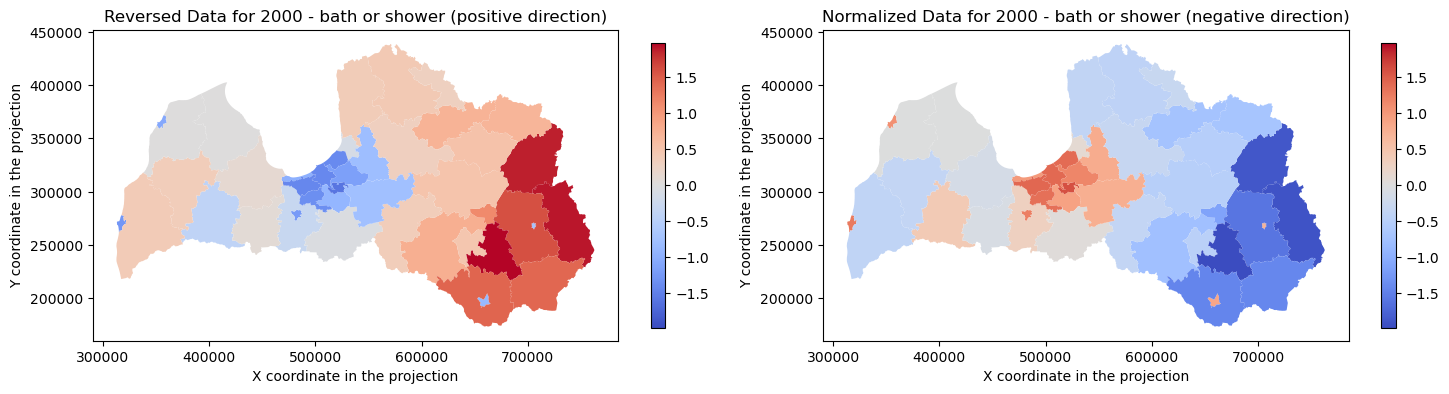

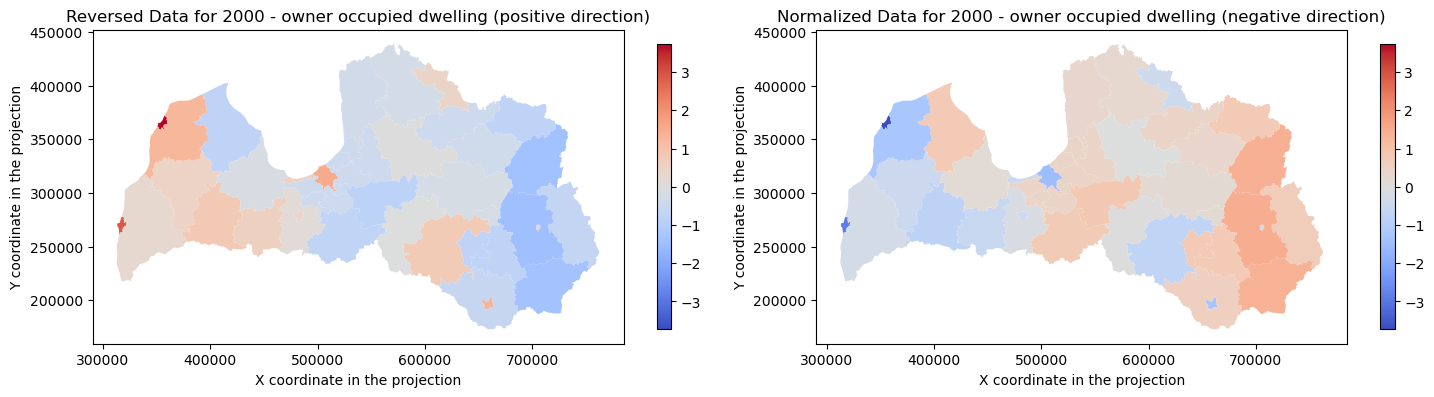

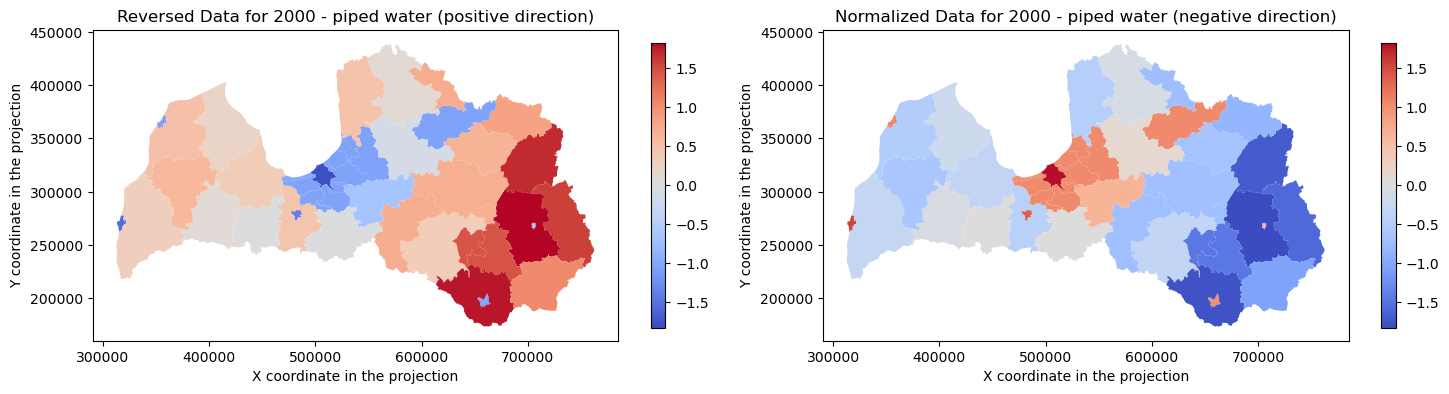

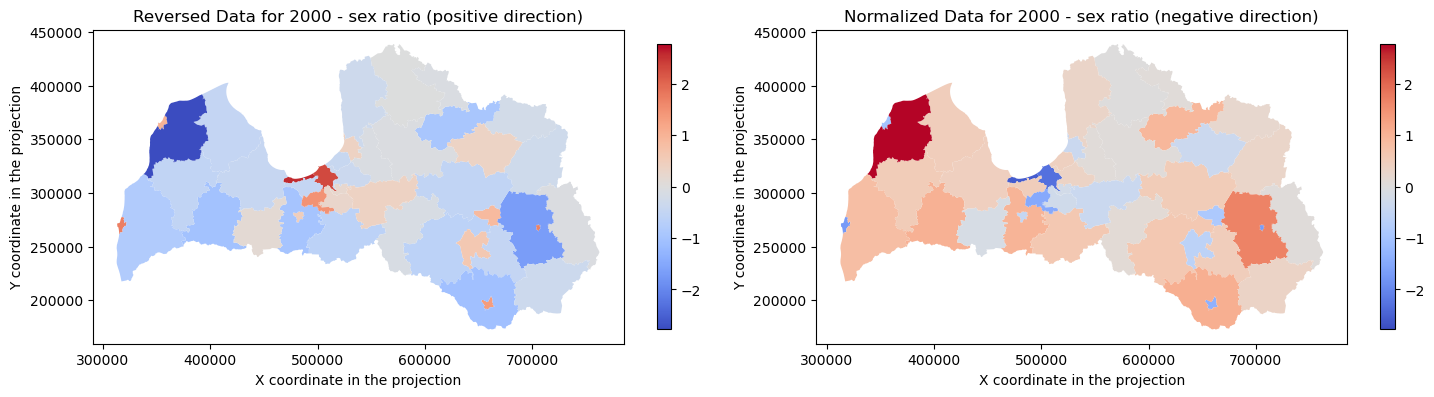

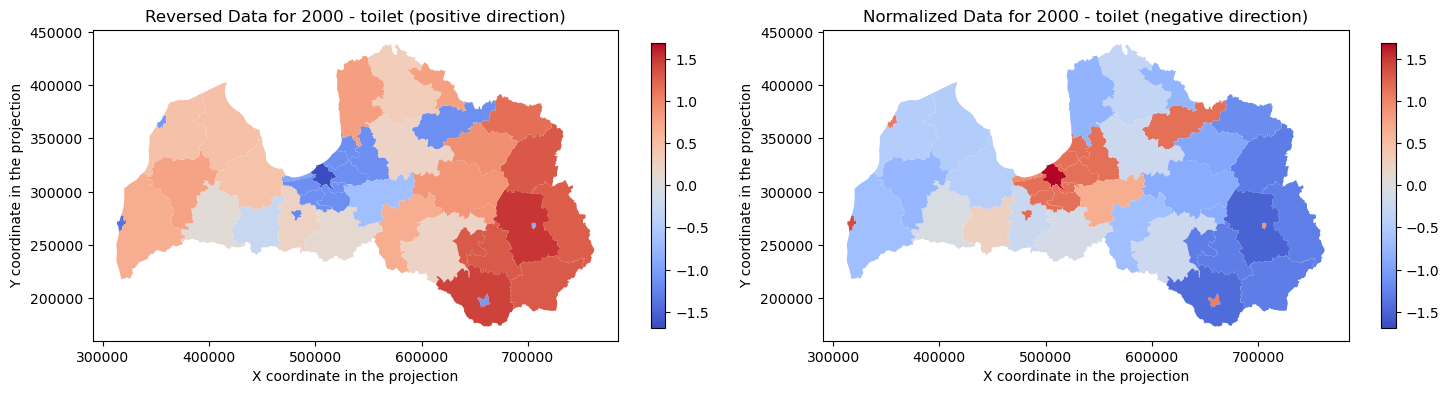

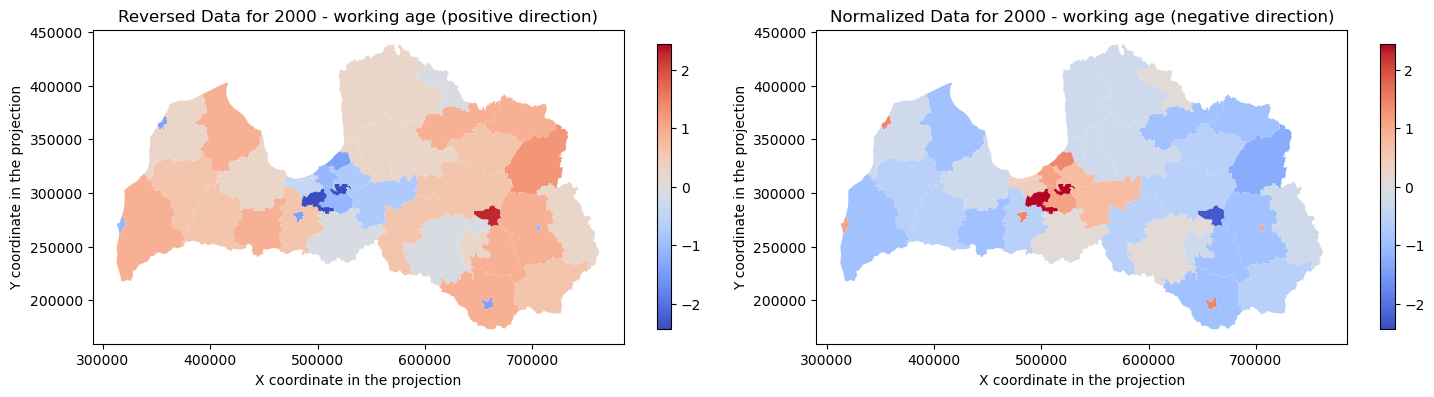

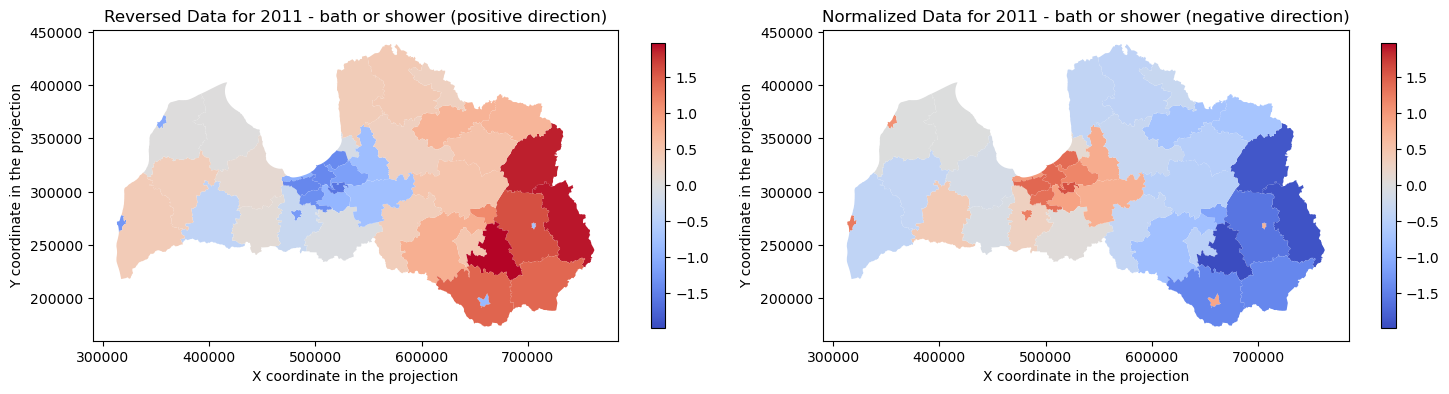

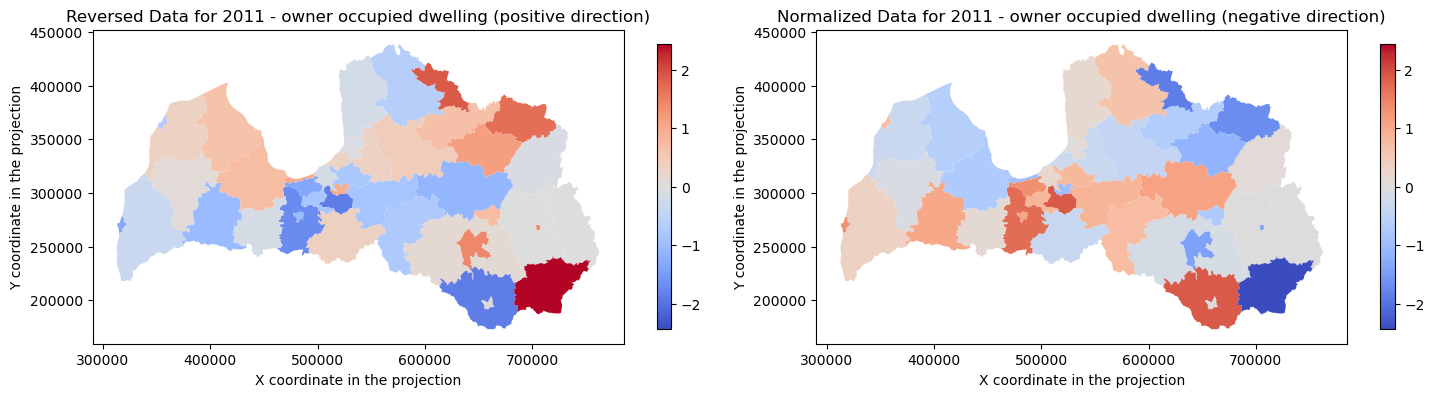

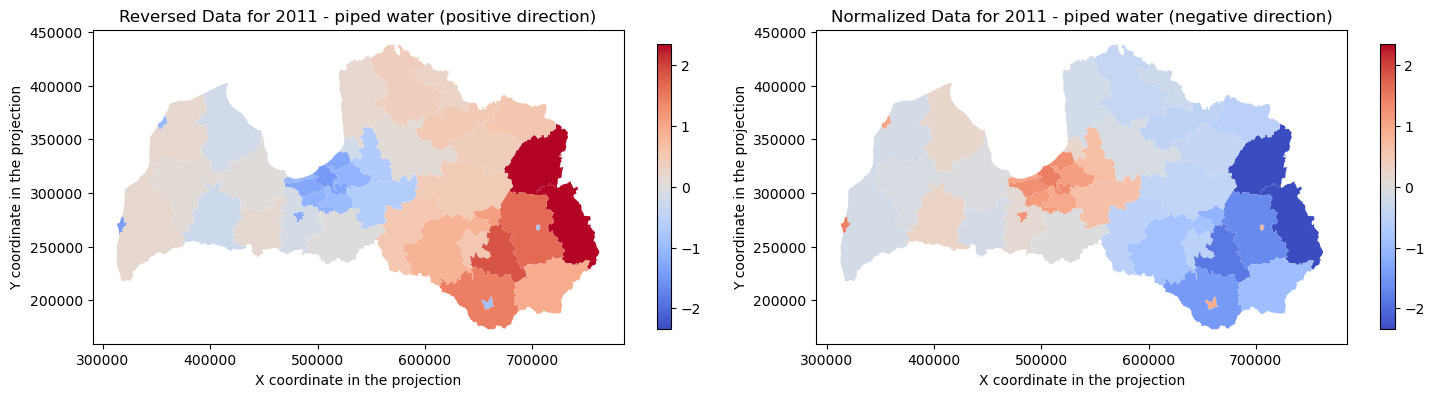

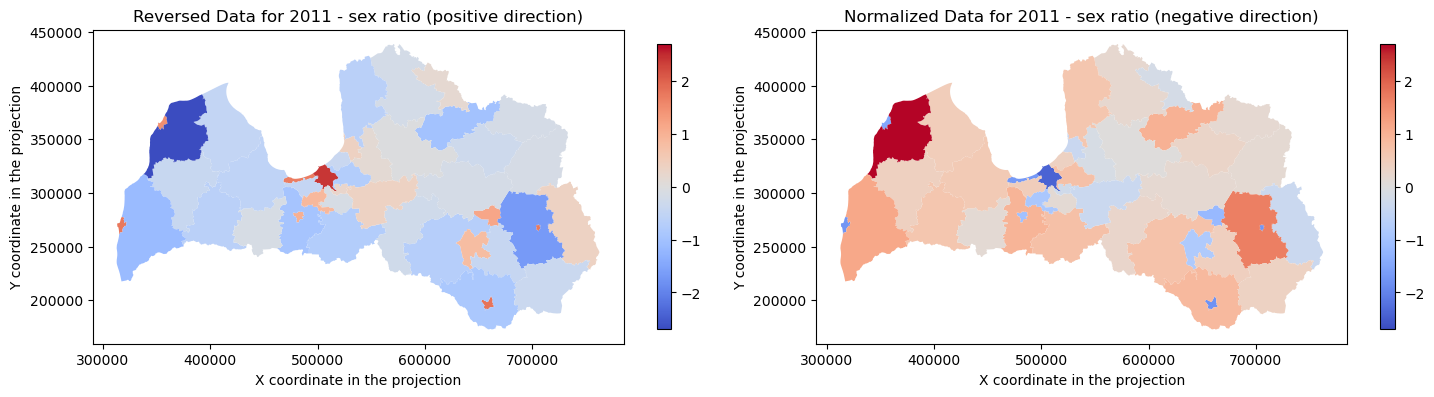

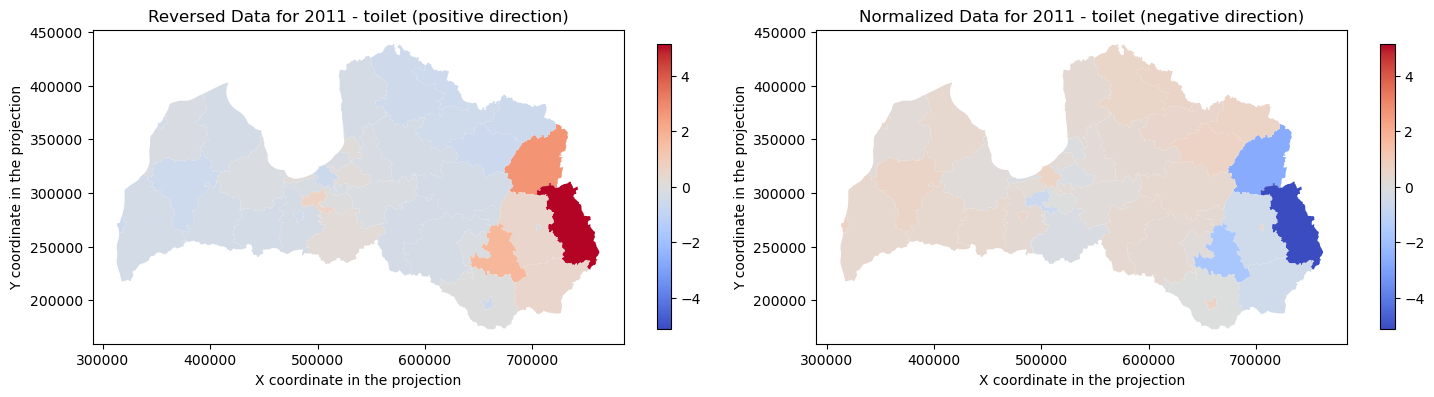

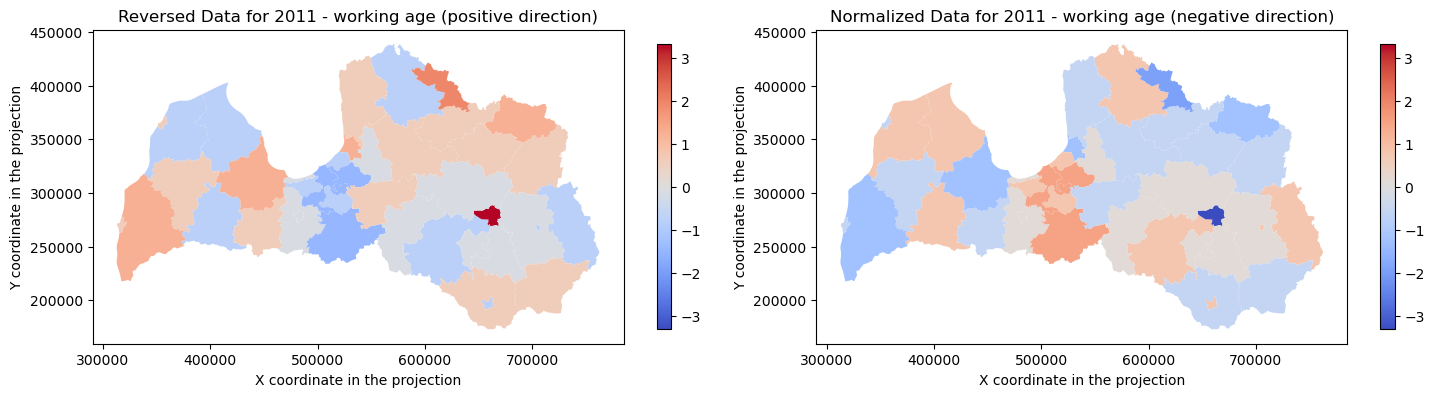

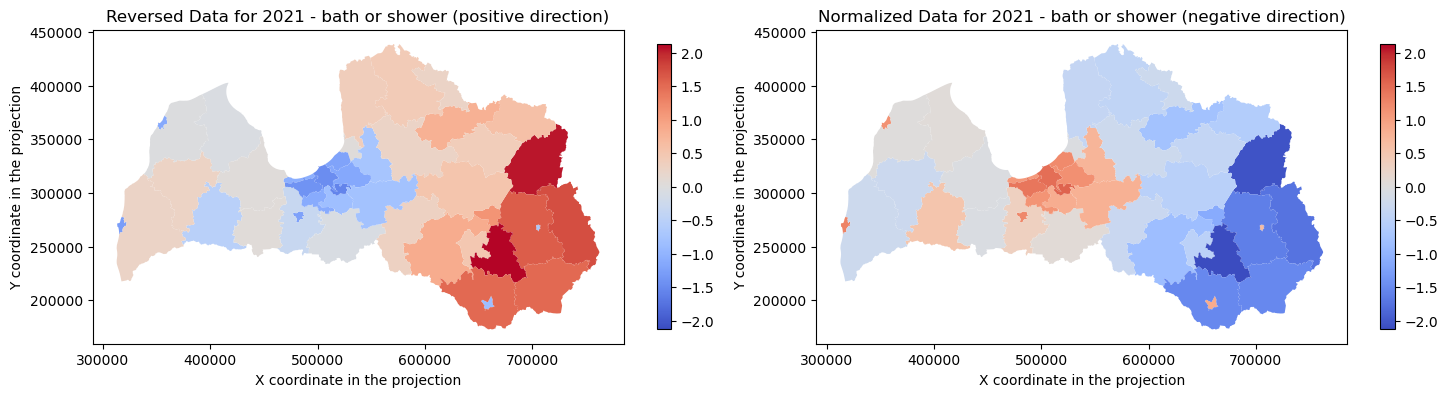

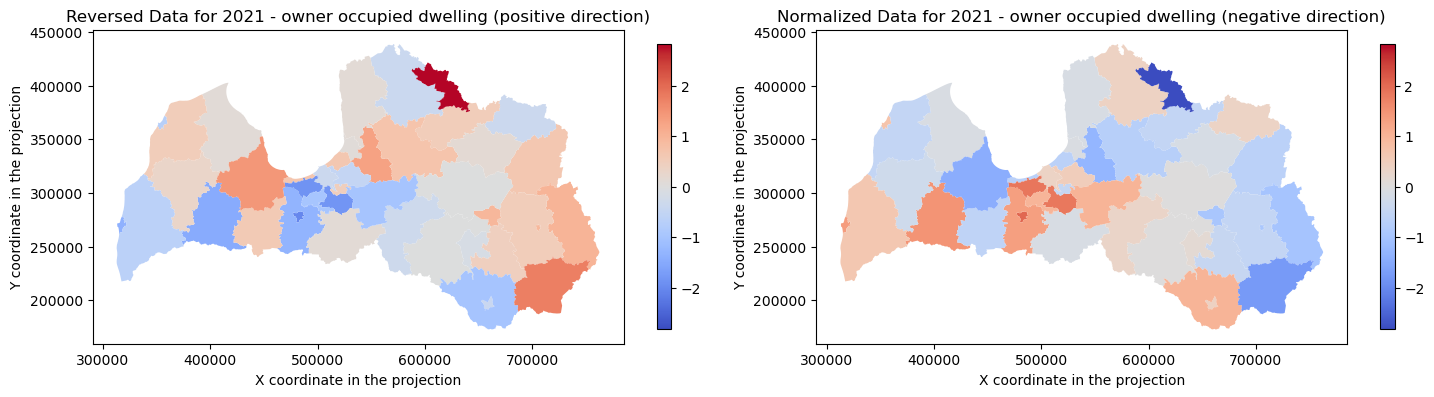

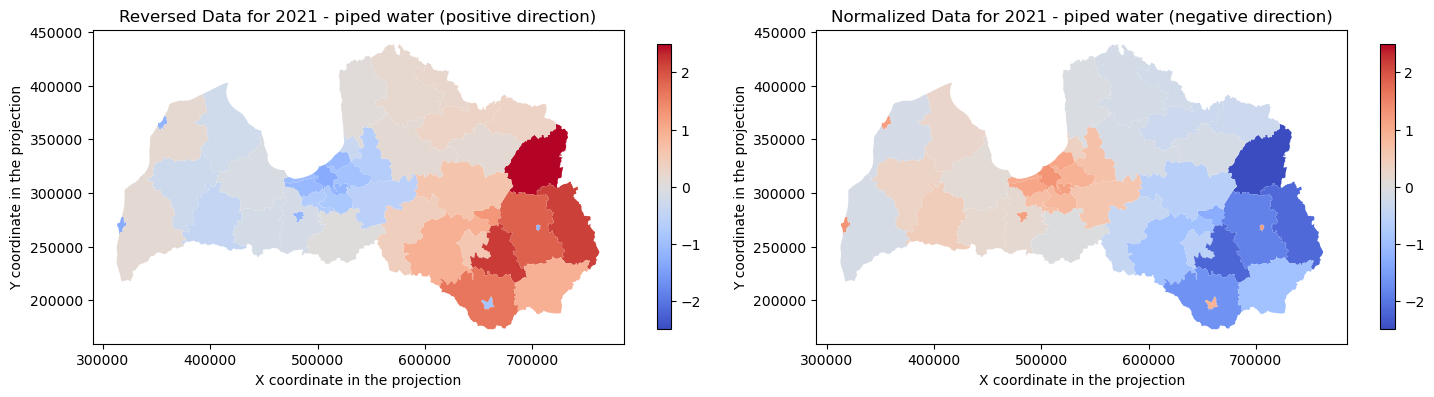

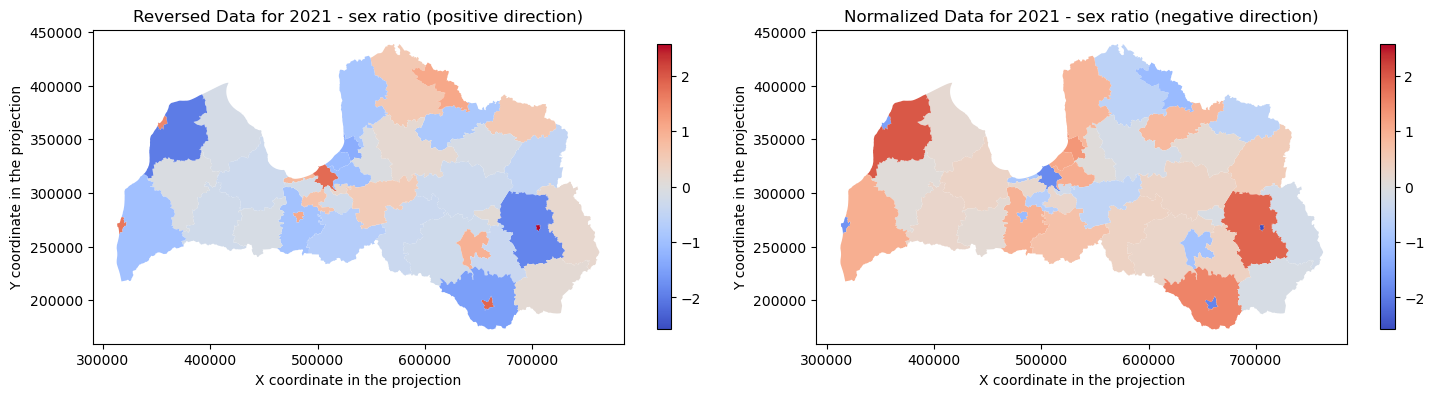

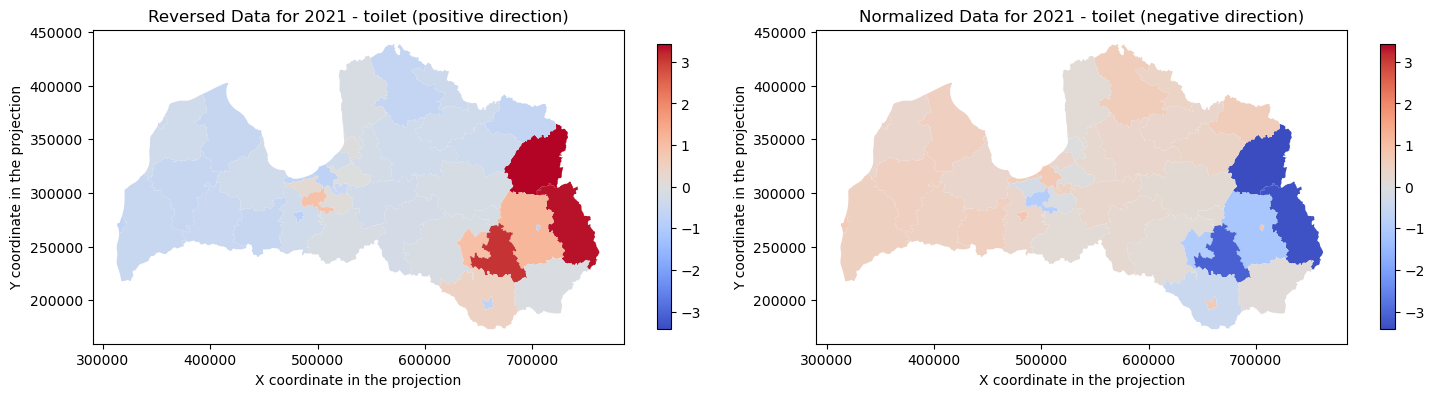

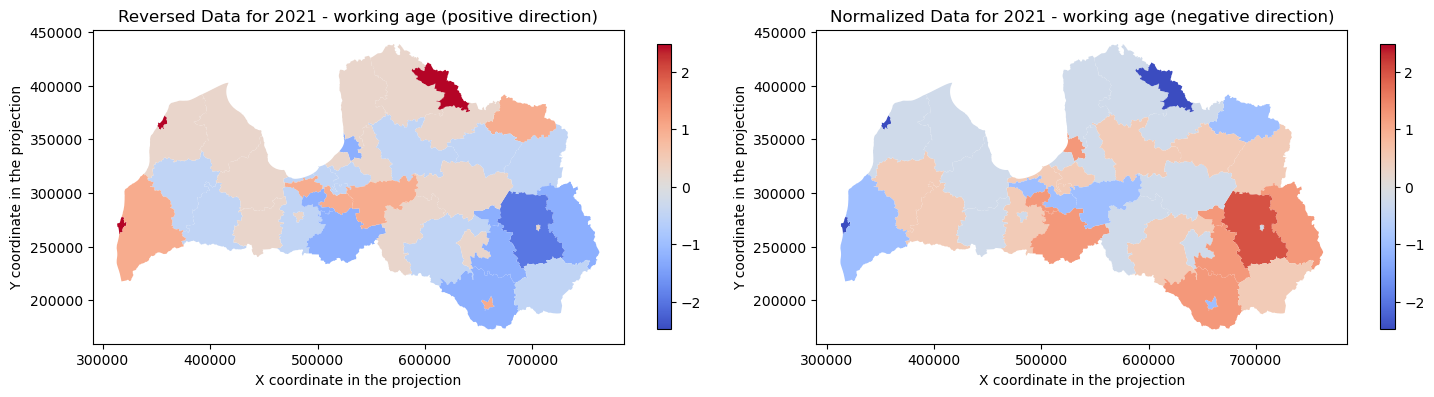

In [6]:
from matplotlib.colors import TwoSlopeNorm
from matplotlib.colors import Normalize, TwoSlopeNorm

reversed_z_scores_gdfs = {} #Dictionary to keep geodataframes for transformed datasets

#Reading in the shapefile for plotting reslts again
# Relative paths from the notebook's directory
municipalities_path = os.path.join("input files", "Administrative territories", "novadi", "Novadi.shp")
cities_path = os.path.join("input files", "Administrative territories", "pilsetas", "Pilsetas.shp")
# Opening Latvia's regions map
municipalities = gpd.read_file(municipalities_path)
cities = gpd.read_file(cities_path)

#Creating LAU 2022 dataset based on the data described in the link above
cities_LAU = ["Rīga", "Daugavpils", "Jelgava", "Jūrmala", "Liepāja", "Rēzekne", "Ventspils"]
cities_LAU_2022 = cities[cities['LABEL'].isin(cities_LAU)]

#THE MAP
#Combining LAU cities and LAU municipalities to have one map
LV_LAU_2022 = pd.concat([cities_LAU_2022, municipalities], ignore_index=True)


for year, rev_df in reversed_z_scores_dfs_by_year.items():
    reversed_z_scores_gdf = LV_LAU_2022.merge(rev_df, left_on='LABEL', right_on='LAU 2022', how='left')
    reversed_z_scores_gdfs[year] = reversed_z_scores_gdf

normalized_z_scores_gdfs = {} #Dictionary to keep geodataframes for initial normalized datasets

for year, norm_df in normalized_z_scores_dfs_by_year.items():
    normalized_z_scores_gdf = LV_LAU_2022.merge(norm_df, left_on='LABEL', right_on='LAU 2022', how='left')
    normalized_z_scores_gdfs[year] = normalized_z_scores_gdf


# Plotting part
variables_to_plot = reversed_z_scores_variables  # The list was saved in the dataset transformation part

if set(reversed_z_scores_gdfs.keys()) == set(normalized_z_scores_gdfs.keys()):  # Checks if both dictionaries have the same set of years
    for year in years_list:
        for variable in variables_to_plot:
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
            reversed_gdf = reversed_z_scores_gdfs[year]
            normalized_gdf = normalized_z_scores_gdfs[year]
            global_min = min(reversed_gdf[variable].min(), normalized_gdf[variable].min())
            global_max = max(reversed_gdf[variable].max(), normalized_gdf[variable].max())
            norm = TwoSlopeNorm(vmin=global_min, vcenter=0, vmax=global_max)

            # Plot for transformed directions data
            reversed_gdf.plot(
                ax=ax1,
                column=variable,
                cmap='coolwarm',
                norm=norm,
                legend=True,
                legend_kwds={'orientation': "vertical", 'shrink': 0.5}
            )
            ax1.set_title(f'Reversed Data for {year} - {variable} (positive direction)')
            ax1.set_xlabel('X coordinate in the projection')
            ax1.set_ylabel('Y coordinate in the projection')

            # Plot for normalized data
            normalized_gdf.plot(
                ax=ax2,
                column=variable,
                cmap='coolwarm',
                norm=norm,
                legend=True,
                legend_kwds={'orientation': "vertical", 'shrink': 0.5}
            )
            ax2.set_title(f'Normalized Data for {year} - {variable} (negative direction)')
            ax2.set_xlabel('X coordinate in the projection')
            ax2.set_ylabel('Y coordinate in the projection')

            plt.tight_layout()  # Adjust layout to prevent overlap
            plt.show()  # Display the plots
else:
    print("The sets of years in both dictionaries do not match. Please align them before plotting.")


# 3.3. Examining suitability for the PCA with Bartlett's test of sphericity and the Kaiser-Meyer-Olkin (KMO) measure.

Bartlett’s Test of Sphericity: This test checks if the correlation matrix of the variables diverges significantly from an identity matrix, which would indicate that the variables are interrelated, and therefore suitable for PCA. It utilizes a chi-square distribution to determine if there is enough evidence to suggest that the variables are correlated.

Kaiser-Meyer-Olkin (KMO) Measure: This is a method for assessing the appropriateness of a correlation matrix for factor analysis, the KMO test measures the sampling adequacy for each variable and for the complete model. This measure ranges from 0 to 1, where values closer to 1 indicate that a higher proportion of variance is shared among all the analyzed variables, making factor analysis more appropriate. A KMO value of 0.5 or higher generally suggests that factor analysis may be useful. The results guide researchers in deciding whether the data is apt for PCA, ensuring the analysis is both meaningful and reliable.

In [7]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo

for year, rev_df in reversed_z_scores_dfs_by_year.items():

    print(f"\nYear: {year}")
    
    # Perform Bartlett's test of sphericity
    chi_square_value, p_value = calculate_bartlett_sphericity(norm_df)
    print("\nBartlett's test of sphericity:")
    print("Chi-square value:", chi_square_value)
    print("P-value:", p_value)
    if p_value < 0.05:
        print("Data is suitable for factor analysis according to Bartlett's test.")
    else:
        print("Data is not suitable for factor analysis according to Bartlett's test.")

    # Perform KMO test
    kmo_all, kmo = calculate_kmo(norm_df)
    print("\nKaiser-Meyer-Olkin (KMO) measure:", kmo)
    if kmo > 0.5:
        print("Data is suitable for factor analysis.")
    else:
        print("Data is not suitable for factor analysis.")



Year: 2000

Bartlett's test of sphericity:
Chi-square value: 1103.807100305899
P-value: 3.857645283170761e-136
Data is suitable for factor analysis according to Bartlett's test.

Kaiser-Meyer-Olkin (KMO) measure: 0.7146544270723362
Data is suitable for factor analysis.

Year: 2011

Bartlett's test of sphericity:
Chi-square value: 1103.807100305899
P-value: 3.857645283170761e-136
Data is suitable for factor analysis according to Bartlett's test.

Kaiser-Meyer-Olkin (KMO) measure: 0.7146544270723362
Data is suitable for factor analysis.

Year: 2021

Bartlett's test of sphericity:
Chi-square value: 1103.807100305899
P-value: 3.857645283170761e-136
Data is suitable for factor analysis according to Bartlett's test.

Kaiser-Meyer-Olkin (KMO) measure: 0.7146544270723362
Data is suitable for factor analysis.


C:\Users\Niels\anaconda3\envs\gis_env\lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


# 3.4. Testing Multicollinearity

In PCA multicollinearity among input variables can help in dimensionality reduction because it leads to a clearer pattern of variance explained by the principal components. Several original variables can be effectively summarized by fewer principal components due to their high correlation. Multicollinearity test can help predict PCA outcomes and explain the results later.

Remember that some variables are reversed.

In [27]:
print(reversed_z_scores_variables)

['bath or shower', 'birth rate', 'owner occupied dwelling', 'piped water', 'sex ratio', 'toilet', 'working age']


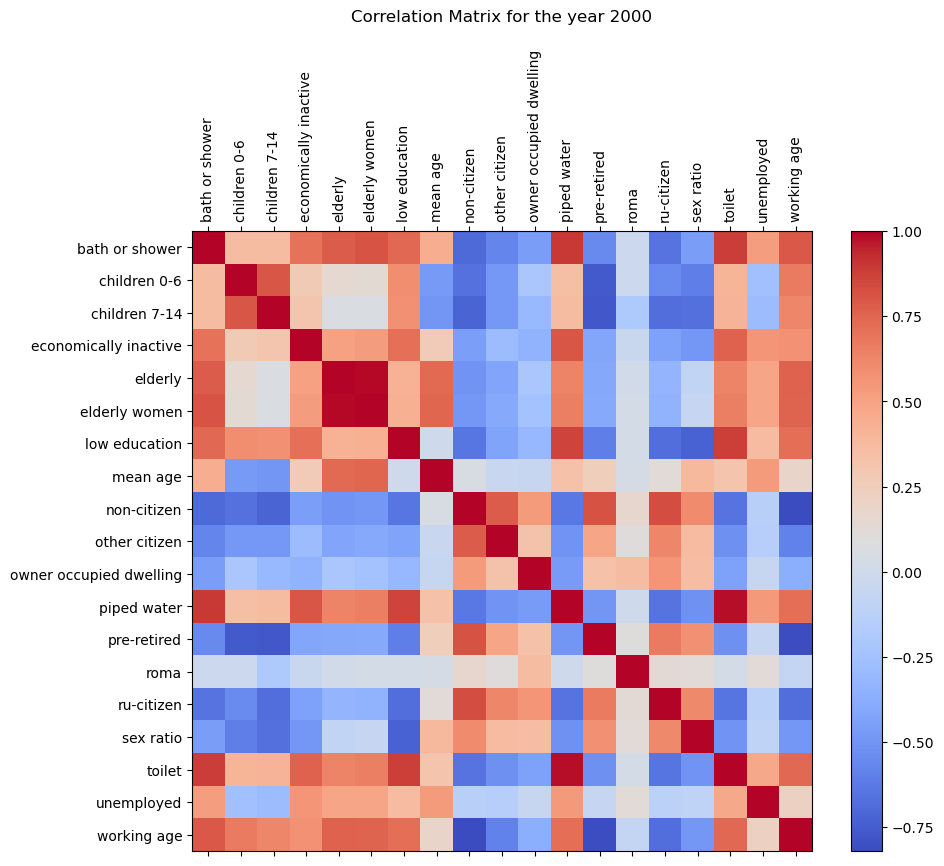

,bath or shower,children 0-6,children 7-14,economically inactive,elderly,elderly women,low education,mean age,non-citizen,other citizen,owner occupied dwelling,piped water,pre-retired,roma,ru-citizen,sex ratio,toilet,unemployed,working age
bath or shower,1.000000,0.360182,0.366922,0.702459,0.781914,0.813790,0.743557,0.448778,-0.697804,-0.577727,-0.464219,0.895667,-0.556873,-0.019228,-0.656387,-0.458664,0.883803,0.517526,0.799202
children 0-6,0.360182,1.000000,0.803658,0.272062,0.140725,0.135519,0.588491,-0.477051,-0.656723,-0.478856,-0.211266,0.349769,-0.757016,-0.021415,-0.545053,-0.602371,0.409672,-0.252927,0.667660
children 7-14,0.366922,0.803658,1.000000,0.304703,0.064824,0.068267,0.584799,-0.493713,-0.719361,-0.484163,-0.306277,0.362514,-0.767170,-0.187962,-0.672522,-0.668364,0.412522,-0.281925,0.626869
economically inactive,0.702459,0.272062,0.304703,1.000000,0.505603,0.524771,0.713482,0.260973,-0.456539,-0.286113,-0.342359,0.807149,-0.409690,-0.033550,-0.441861,-0.488085,0.761269,0.562641,0.575527
elderly,0.781914,0.140725,0.064824,0.505603,1.000000,0.988421,0.425236,0.732246,-0.502000,-0.418140,-0.210272,0.636737,-0.405313,0.014627,-0.325837,-0.081099,0.636303,0.486659,0.759487


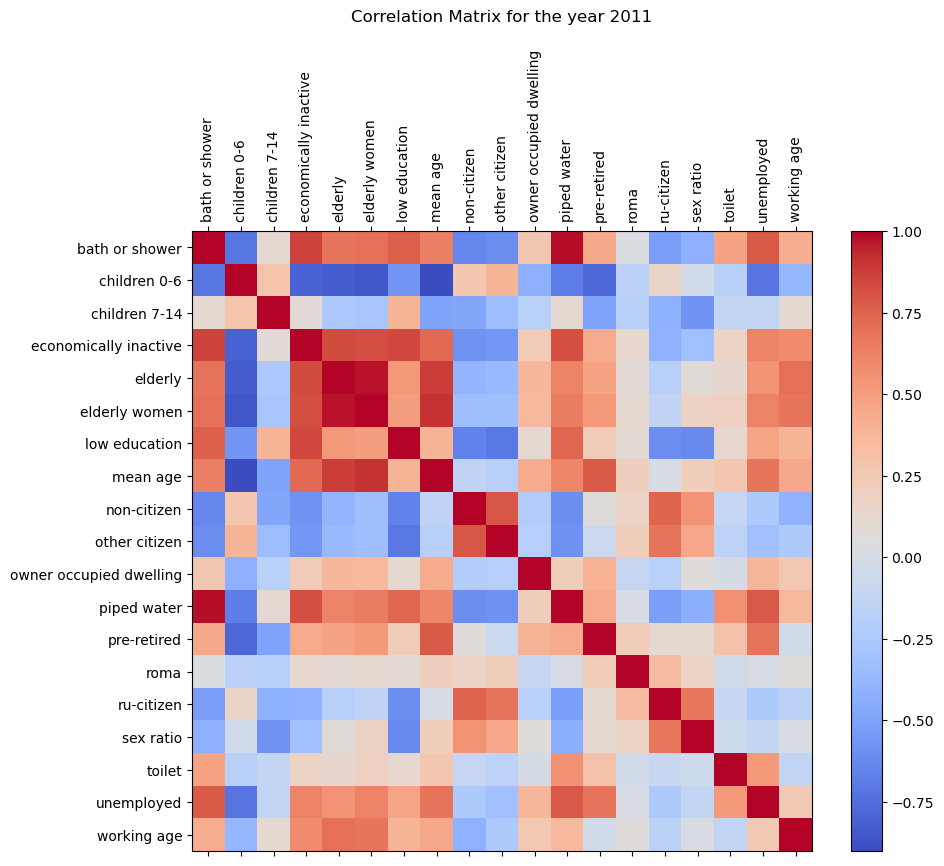

,bath or shower,children 0-6,children 7-14,economically inactive,elderly,elderly women,low education,mean age,non-citizen,other citizen,owner occupied dwelling,piped water,pre-retired,roma,ru-citizen,sex ratio,toilet,unemployed,working age
bath or shower,1.000000,-0.710885,0.113138,0.861550,0.683075,0.696405,0.761808,0.640010,-0.636920,-0.610310,0.261976,0.984480,0.449673,0.020902,-0.523512,-0.421889,0.478239,0.777594,0.422597
children 0-6,-0.710885,1.000000,0.281136,-0.801875,-0.820159,-0.853925,-0.559974,-0.901417,0.266033,0.381871,-0.423506,-0.672621,-0.779862,-0.166469,0.155849,-0.032934,-0.184364,-0.724153,-0.378044
children 7-14,0.113138,0.281136,1.000000,0.080514,-0.252130,-0.277257,0.376740,-0.491099,-0.471706,-0.334566,-0.179906,0.113678,-0.495104,-0.188163,-0.418394,-0.567833,-0.115691,-0.124861,0.113709
economically inactive,0.861550,-0.801875,0.080514,1.000000,0.830253,0.819061,0.838187,0.723626,-0.579989,-0.556513,0.229317,0.818094,0.437193,0.123310,-0.407867,-0.321339,0.165961,0.622959,0.589802
elderly,0.683075,-0.820159,-0.252130,0.830253,1.000000,0.975654,0.529009,0.876253,-0.382065,-0.356545,0.365770,0.626359,0.474794,0.087826,-0.195145,0.074866,0.126845,0.550165,0.702308


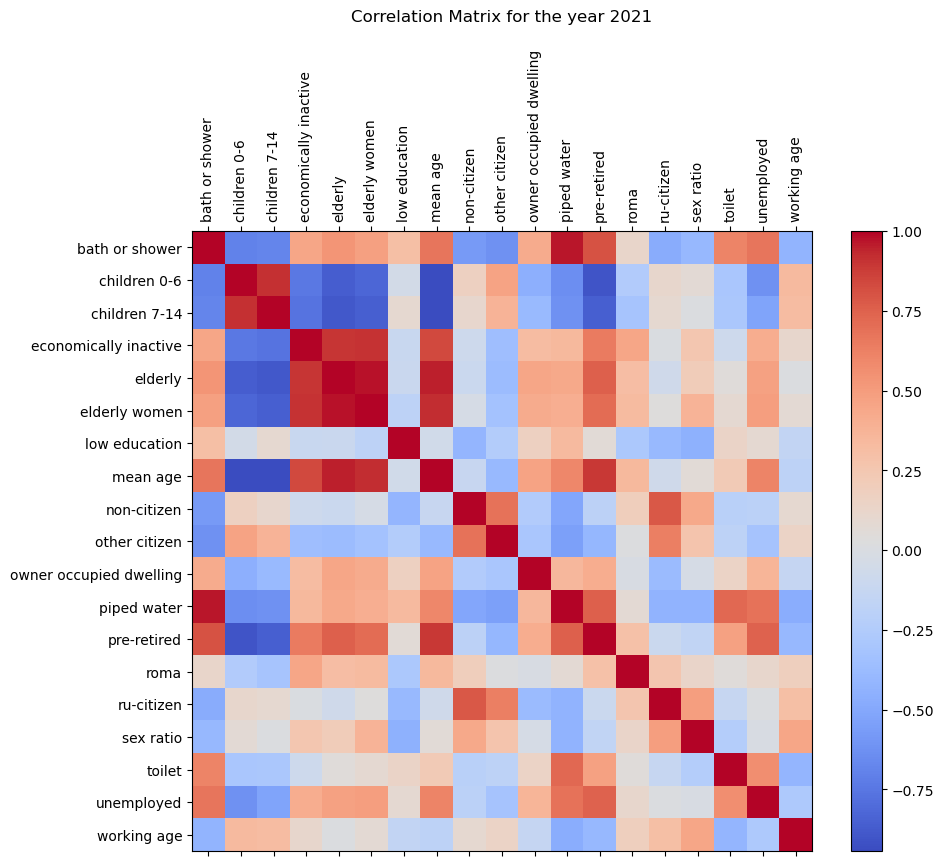

,bath or shower,children 0-6,children 7-14,economically inactive,elderly,elderly women,low education,mean age,non-citizen,other citizen,owner occupied dwelling,piped water,pre-retired,roma,ru-citizen,sex ratio,toilet,unemployed,working age
bath or shower,1.000000,-0.693717,-0.678526,0.447495,0.530319,0.482693,0.303786,0.672456,-0.578592,-0.621739,0.419051,0.966135,0.807590,0.122070,-0.478583,-0.398580,0.607530,0.668402,-0.421741
children 0-6,-0.693717,1.000000,0.911747,-0.741258,-0.866545,-0.822327,-0.046030,-0.943552,0.169542,0.462060,-0.457453,-0.633216,-0.901341,-0.249122,0.114440,0.066414,-0.292233,-0.620063,0.335040
children 7-14,-0.678526,0.911747,1.000000,-0.762758,-0.888433,-0.853026,0.093947,-0.936585,0.107849,0.372588,-0.384544,-0.618560,-0.856555,-0.306663,0.091526,0.009569,-0.285822,-0.522442,0.323200
economically inactive,0.447495,-0.741258,-0.762758,1.000000,0.897788,0.901645,-0.115967,0.834218,-0.084984,-0.358037,0.318630,0.346621,0.645645,0.450514,-0.001734,0.251811,-0.084967,0.414365,0.118912
elderly,0.530319,-0.866545,-0.888433,0.897788,1.000000,0.971078,-0.107524,0.953583,-0.093511,-0.370538,0.452368,0.437229,0.756191,0.313774,-0.066038,0.204085,0.049879,0.471539,0.010317


In [8]:
#This part of the code plots corellation matrix heatmaps for each year and displays the correlation matrix table

for year, reversed_z_scores_df in reversed_z_scores_dfs_by_year.items():
    correlation_matrix = reversed_z_scores_df.corr() 

    #Creates a plot
    plt.figure(figsize=(10, 8)) 
    plt.matshow(correlation_matrix, fignum=1, cmap='coolwarm')  
    plt.title(f'Correlation Matrix for the year {year}', pad=20)
    plt.colorbar() 
    
    # Sets ticks and labels
    ticks = np.arange(len(correlation_matrix.columns))
    plt.xticks(ticks, correlation_matrix.columns, rotation=90)
    plt.yticks(ticks, correlation_matrix.columns)

    plt.grid(False)  #Turns off the grid to not obscure the cells
    plt.show() 
    
    display(correlation_matrix.head())

# 3.5. <span style="color:red;">[NEED HELP] </span> Performing PCA.

**The PCA analysis can be only perfomed in the R studio.**

<span style="color:red;"> ***I have tried to use scikit learn PCA and the rotator function from factor analyzer, but the results are terrible, it is impossible to interpret them. And there is no other option in Python to use PCA and then use varimax rotation on the Principal Compononets. Therefore I decided to use R psych package to perform PCA with rotation. But I failed to use R code sells in the same notebook. My kernel kept crashing. So I now use R markdown, which s located in the same folder*** </span> 

**Therefore, first it is needed to download the zet score dataframes into the directory as CSV files.**

In [21]:
#Creates z_scores folder in the ouput folder
output_dir_for_z_scores = os.path.join("output","HVI_SoVIA","SoVIA_z_scores")
os.makedirs(output_dir_for_z_scores, exist_ok=True)
print(f"Output directory {'already exists' if os.path.exists(output_dir_for_z_scores) else 'created'}.")

Output directory already exists.


In [13]:
#Saves the normalized datasets into the folder
for year, reversed_z_scores_df in reversed_z_scores_dfs_by_year.items():
    output_path = os.path.join(output_dir_for_z_scores, f"SoVIA_z_scores_{year}.csv")
    reversed_z_scores_df.to_csv(output_path, encoding='utf-8-sig')
    print(f"Saved normalized DataFrame for the year {year} to {output_path}")

Saved normalized DataFrame for the year 2000 to output\HVI_SoVIA\SoVIA_z_scores\SoVIA_z_scores_2000.csv
Saved normalized DataFrame for the year 2011 to output\HVI_SoVIA\SoVIA_z_scores\SoVIA_z_scores_2011.csv
Saved normalized DataFrame for the year 2021 to output\HVI_SoVIA\SoVIA_z_scores\SoVIA_z_scores_2021.csv


**Perform the PCA analysis in R Studio. For that in the main folder open the script "PCA calculator for Heatwave SoVI" and follow the instructions there. After finishing, come back to this code and continue the analysis.**

__________________________________________________________ **RUN THE PCA CALCULATOR IN R**__________________________________________________________

**After running the R code in R studio a new folder have been created: output-> PCA.**

**There the datasets with:**
1. eigen values of rotated principal components;
2. variable loadings on rotated principle components;
3. proportion and cumulative proprtion of rotated components explained;
4. scores of rotated principal components have been saved.

**They will be used for further analysis in this notebook.**

**Please run the code to read the PCA results in.**

In [22]:
# This part reads in eigenvalues files and creates a dictionary of eigenvalues dataframes
directory_path = os.path.join('output', 'HVI_SoVIA','PCA')

eigenvalues_dfs = {}

for filename in os.listdir(directory_path):
    if 'eigenvalues' in filename and filename.endswith('.csv'):
        parts = filename.split('_')
        year = parts[2] 
        year = int(year.split('.')[0])
        file_path = os.path.join(directory_path, filename)
        eigenvalues_dfs[year] = pd.read_csv(file_path)

# This part reads in variable loadings files and creates a dictionary of loadings dataframes
directory_path = os.path.join('output', 'HVI_SoVIA', 'PCA')

loadings_dfs = {}

for filename in os.listdir(directory_path):
    if 'loadings' in filename and filename.endswith('.csv'):
        parts = filename.split('_')
        year = parts[2] 
        year = int(year.split('.')[0])
        file_path = os.path.join(directory_path, filename)
        loadings_dfs[year] = pd.read_csv(file_path)

# This part reads in PCA scores files and creates a dictionary of PCA scores dataframes
directory_path = os.path.join('output','HVI_SoVIA', 'PCA')

PCA_scores_dfs = {}

for filename in os.listdir(directory_path):
    if 'PCA_scores' in filename and filename.endswith('.csv'):
        parts = filename.split('_')
        year = parts[3] 
        year = int(year.split('.')[0])
        file_path = os.path.join(directory_path, filename)
        PCA_scores_dfs[year] = pd.read_csv(file_path)
        
#Display first five rows of the dataframes for inspection
for year in years_list:
    print("")
    print(f"\nDataframes for year {year}")
    print("\nEigenvalues")
    display(eigenvalues_dfs[year].head()) 
    print("\nLoadings of variables on rotated components")
    display(loadings_dfs[year].head())
    print("\nPCA scores of each location")
    display(PCA_scores_dfs[year].head())



Dataframes for year 2000

Eigenvalues


,pca_varimax$values
0,9.563943
1,3.716569
2,1.394780
3,1.283403
4,0.736700



Loadings of variables on rotated components


,variables,RC7,RC2,RC1,RC5,RC6,RC3,RC4,RC9,RC11,RC8,RC10,RC13,RC12,RC14,RC15,RC16,RC17,RC18,RC19
0,bath or shower,0.268898,0.602030,0.555552,-0.232385,-0.214526,0.175347,0.007974,-0.134813,-0.132445,0.067598,0.016847,0.034260,0.289069,0.012976,-0.011524,-0.012993,0.002206,0.000431,0.000896
1,children 0-6,0.823950,-0.059415,0.250522,-0.195202,-0.021792,-0.218430,0.036792,-0.124997,0.025537,0.031723,0.384651,-0.036842,0.008178,0.017549,0.009266,0.009191,-0.005425,0.000103,0.000032
2,children 7-14,0.794853,-0.129121,0.265991,-0.200736,-0.074997,-0.241318,-0.115815,-0.166775,-0.135034,0.084726,-0.060720,0.324757,0.026000,0.005625,0.009642,0.002871,0.005389,-0.000319,0.000167
3,economically inactive,0.182108,0.288110,0.611562,-0.014661,-0.121028,0.260776,-0.032251,-0.129818,-0.015121,0.639171,0.007447,0.012510,0.007835,-0.002723,0.000329,0.003536,0.000262,0.000046,0.000046
4,elderly,0.167989,0.936352,0.215685,-0.133286,-0.033178,0.127569,0.006253,-0.014107,-0.020091,0.051484,0.002135,-0.032543,-0.048217,-0.005415,-0.002909,0.008538,-0.062498,0.003866,-0.051506



PCA scores of each location


,LAU 2022,RC7,RC2,RC1,RC5,RC6,RC3,RC4,RC9,RC11,RC8,RC10,RC13,RC12,RC14,RC15,RC16,RC17,RC18,RC19
0,Aizkraukles nov.,0.172306,0.020737,0.878443,-0.189078,0.247899,-0.415085,-0.384251,0.234533,-0.239546,-1.659790,-0.457240,-0.560142,0.140268,0.195686,-1.768657,1.537276,-0.193980,0.427781,-1.083214
1,Alūksnes nov.,0.949652,0.278752,0.554262,-0.614265,-0.370534,-1.110405,-0.362564,0.816222,0.605915,2.036816,0.186584,-0.524194,-0.147727,0.916887,-1.406760,-1.071931,0.044625,-2.460998,-1.873067
2,Augšdaugavas nov.,-0.775112,1.201277,1.372203,1.419164,-0.366123,0.896760,0.107945,-1.451121,-0.535926,-0.282828,-0.553158,-0.244092,0.030816,0.456852,-1.233938,1.946266,1.334583,0.148402,1.122122
3,Balvu nov.,-0.036739,1.245384,0.464012,-0.531829,-1.225571,1.044821,0.270794,0.262429,0.583822,2.582528,0.693491,0.902373,0.665929,0.131000,0.216129,0.273539,0.966840,1.419876,-1.456264
4,Bauskas nov.,1.024264,-0.761111,0.591970,2.008478,-0.800047,0.290847,-0.333699,0.062723,-0.336228,-1.445395,-0.635225,1.324360,0.322783,-0.464519,0.860181,-0.806156,-0.415534,-0.082801,-0.518366




Dataframes for year 2011

Eigenvalues


,pca_varimax$values
0,8.566487
1,3.932815
2,1.725300
3,1.247348
4,0.932798



Loadings of variables on rotated components


,variables,RC1,RC7,RC2,RC3,RC5,RC6,RC8,RC4,RC11,RC9,RC12,RC10,RC14,RC13,RC15,RC16,RC17,RC18,RC19
0,bath or shower,0.678818,-0.352587,-0.346065,0.376264,0.101799,0.064936,0.098080,0.020288,0.203175,-0.097722,-0.016754,-0.076752,0.259076,-0.017549,0.012425,0.015483,-0.013122,0.001587,0.062788
1,children 0-6,-0.914705,0.159562,0.006296,-0.037149,0.063010,-0.175520,0.064915,-0.083693,-0.129219,-0.001769,-0.165315,-0.048385,-0.001372,-0.005536,0.208712,0.011439,0.018254,0.003108,0.001350
2,children 7-14,-0.248288,-0.261368,-0.307518,-0.049727,0.111840,-0.090369,0.858905,-0.075529,0.008152,-0.060816,-0.061288,-0.031287,0.010634,0.016295,0.000905,0.004764,-0.000291,0.000168,0.000042
3,economically inactive,0.837345,-0.302755,-0.297367,0.053929,0.180645,-0.003564,0.113150,0.080033,0.055979,-0.030696,-0.029697,-0.052374,0.045087,0.096794,0.007568,0.211706,-0.004952,-0.000088,0.000132
4,elderly,0.905912,-0.147700,0.021194,0.026136,0.315640,0.101201,-0.106006,-0.002457,-0.050622,-0.042593,-0.063221,-0.050279,-0.055637,-0.006525,0.095176,-0.063615,-0.060398,-0.066841,-0.001387



PCA scores of each location


,LAU 2022,RC1,RC7,RC2,RC3,RC5,RC6,RC8,RC4,RC11,RC9,RC12,RC10,RC14,RC13,RC15,RC16,RC17,RC18,RC19
0,Aizkraukles nov.,0.774747,-0.428286,0.149112,-0.496881,-0.582897,-1.001081,0.827382,-0.297804,-0.801105,-0.849649,1.042714,0.706865,0.794159,-1.262668,-1.142473,-0.616082,0.353475,-0.194879,-1.144212
1,Alūksnes nov.,0.424494,-0.400687,-0.142299,-0.559065,0.807120,1.575341,0.620721,-0.758727,0.965382,1.450028,-1.300844,-0.328530,0.365285,-1.296795,-2.074149,0.064161,0.304945,-2.043518,-0.001312
2,Augšdaugavas nov.,1.801864,2.150710,-1.655751,-0.283376,0.231714,-2.340604,-0.729057,0.180128,0.769827,-0.633392,0.534541,-0.920146,1.352703,-0.553849,0.805890,1.955496,1.050410,-1.347432,0.351943
3,Balvu nov.,0.737612,-0.211106,0.289900,2.665923,0.469238,-0.300303,0.993673,0.220368,0.783008,-0.612893,0.373896,-0.163399,0.542251,-0.001787,-0.221800,0.322609,-0.046045,0.333528,-1.810048
4,Bauskas nov.,0.103823,-0.340757,-0.569248,0.018554,-2.029158,0.599932,0.641269,-0.231831,0.184827,-0.148295,-1.632777,1.176447,-1.202421,0.560540,-0.084420,1.093417,0.964719,0.814214,0.021087




Dataframes for year 2021

Eigenvalues


,pca_varimax$values
0,8.499325
1,3.864555
2,1.799714
3,0.991334
4,0.927537



Loadings of variables on rotated components


,variables,RC1,RC2,RC3,RC5,RC9,RC6,RC4,RC7,RC8,RC10,RC12,RC11,RC13,RC14,RC16,RC15,RC17,RC18,RC19
0,bath or shower,0.531742,-0.439898,0.508858,-0.170979,-0.211086,0.151655,0.057136,0.098565,0.202690,-0.099694,0.308799,-0.021367,0.018923,0.065927,0.008469,-0.016629,-0.056072,0.000237,-0.000825
1,children 0-6,-0.899367,0.059519,-0.172432,0.198642,0.094195,-0.058239,-0.039959,-0.122945,-0.134244,0.133365,0.049870,0.060177,0.063544,-0.023233,0.204291,-0.034604,0.001129,-0.000585,0.000484
2,children 7-14,-0.922964,0.048786,-0.197594,0.204752,0.061990,0.066935,-0.073835,-0.059016,-0.002191,0.032241,-0.040491,0.030039,0.041312,0.029794,-0.036850,0.199982,0.001154,-0.000253,0.000549
3,economically inactive,0.877804,-0.079752,-0.124203,0.130241,0.120783,-0.008710,0.222922,0.025257,0.099896,-0.058396,0.038910,0.011674,0.331583,-0.019846,0.015446,0.009688,0.001146,-0.000294,0.000403
4,elderly,0.972864,-0.067485,-0.002467,0.084825,0.075210,-0.036198,0.052330,0.130618,0.039449,-0.027535,-0.011892,0.055932,-0.013859,-0.017738,0.057981,0.031520,-0.003025,-0.064743,-0.019138



PCA scores of each location


,LAU 2022,RC1,RC2,RC3,RC5,RC9,RC6,RC4,RC7,RC8,RC10,RC12,RC11,RC13,RC14,RC16,RC15,RC17,RC18,RC19
0,Aizkraukles nov.,0.715964,-0.422279,-0.158808,0.446430,-0.528329,-0.155998,-0.528178,-0.677829,-0.178577,-0.347315,-0.135766,1.485311,0.776296,-0.113672,0.800897,0.377578,0.593253,1.176389,-2.798280
1,Alūksnes nov.,0.878804,-0.488531,-0.560834,1.100824,0.843976,1.934637,-1.079446,-1.010848,0.570661,-0.119232,0.850540,0.283954,-2.038207,1.382921,-1.534643,-1.077552,0.391369,-0.395823,-0.054534
2,Augšdaugavas nov.,1.578843,1.208643,0.266118,-0.875166,-2.033555,0.529134,0.935078,-1.502121,0.740856,1.259626,1.497291,-0.318915,0.203643,0.223266,0.195847,-0.486934,0.489657,-1.338956,1.122348
3,Balvu nov.,0.299664,-0.627350,3.652897,0.387568,-0.076425,-0.716723,0.488490,0.367171,-0.982263,0.069539,0.126653,0.261440,0.882731,0.329779,-0.919047,-0.716394,0.927131,-0.632894,-0.559750
4,Bauskas nov.,-0.045451,-0.167319,-0.359802,-1.312260,-0.290721,0.859708,-0.364511,0.049376,-0.295499,1.536116,-0.477202,0.889642,2.116871,0.186006,-1.810873,0.704109,-0.251243,0.367665,-1.651739


# 3.6 Selecting calculated principal components applying Keiser Criterion.

**At this step it is necessary to decide how many rotated principal components have to be used for index construction. For that a Keiser criterion will be used. Only rotated principal components with the eigen value higher then 1 will be used for index construction. For more details about Keiser criterion please refer to the text version of the guide.** **<span style="color:red;">[ATTACH LINK!]** </span>

In [23]:
#This part of the code filters out the loadings dataset to extract components with eigen values > 1. 
# Dictionary to store the modified loadings DataFrames
modified_loadings_dfs = {}

#The loop to filter loadings dataset
for year, eigen_df in eigenvalues_dfs.items():
    # Identifies columns where the eigenvalue is greater than 1
    condition = eigen_df.iloc[:, 0] > 1
    filtered_index = eigen_df[condition].index
    significant_indices = filtered_index.tolist()

    if year in loadings_dfs:
        first_column_name = loadings_dfs[year].columns[0]
        columns_to_keep = [first_column_name]
        
        for index in significant_indices:
            column_name = loadings_dfs[year].columns[index + 1]
            columns_to_keep.append(column_name)
        
        modified_loadings_df = loadings_dfs[year][columns_to_keep]
        modified_loadings_dfs[year] = modified_loadings_df

# Display the first 5 rows of the modified DataFrames for inspection
for year, df in modified_loadings_dfs.items():
    print(f"Modified Loadings for {year}:")
    display(df.head())

Modified Loadings for 2000:


,variables,RC7,RC2,RC1,RC5
0,bath or shower,0.268898,0.602030,0.555552,-0.232385
1,children 0-6,0.823950,-0.059415,0.250522,-0.195202
2,children 7-14,0.794853,-0.129121,0.265991,-0.200736
3,economically inactive,0.182108,0.288110,0.611562,-0.014661
4,elderly,0.167989,0.936352,0.215685,-0.133286


Modified Loadings for 2011:


,variables,RC1,RC7,RC2,RC3
0,bath or shower,0.678818,-0.352587,-0.346065,0.376264
1,children 0-6,-0.914705,0.159562,0.006296,-0.037149
2,children 7-14,-0.248288,-0.261368,-0.307518,-0.049727
3,economically inactive,0.837345,-0.302755,-0.297367,0.053929
4,elderly,0.905912,-0.147700,0.021194,0.026136


Modified Loadings for 2021:


,variables,RC1,RC2,RC3
0,bath or shower,0.531742,-0.439898,0.508858
1,children 0-6,-0.899367,0.059519,-0.172432
2,children 7-14,-0.922964,0.048786,-0.197594
3,economically inactive,0.877804,-0.079752,-0.124203
4,elderly,0.972864,-0.067485,-0.002467


In [24]:
#This part of the code filters out the scores dataset to extract components with eigen values > 1.
# Dictionary to store the modified PCA scores DataFrames
modified_PCA_scores_dfs = {}

for year, eigen_df in eigenvalues_dfs.items():
    # Identifies columns where the eigenvalue is greater than 1
    condition = eigen_df.iloc[:, 0] > 1
    filtered_index = eigen_df[condition].index
    significant_indices = filtered_index.tolist()

    if year in PCA_scores_dfs:
        first_column_name = PCA_scores_dfs[year].columns[0]
        columns_to_keep = [first_column_name]
        for index in significant_indices:
            column_name = PCA_scores_dfs[year].columns[index + 1]
            columns_to_keep.append(column_name)
        
        modified_PCA_scores_df = PCA_scores_dfs[year][columns_to_keep]
        modified_PCA_scores_dfs[year] = modified_PCA_scores_df

# Display the first 5 rows of the modified dataframes for inspection
for year, df in modified_PCA_scores_dfs.items():
    print(f"Modified PCA scores for {year}:")
    display(df.head())

Modified PCA scores for 2000:


,LAU 2022,RC7,RC2,RC1,RC5
0,Aizkraukles nov.,0.172306,0.020737,0.878443,-0.189078
1,Alūksnes nov.,0.949652,0.278752,0.554262,-0.614265
2,Augšdaugavas nov.,-0.775112,1.201277,1.372203,1.419164
3,Balvu nov.,-0.036739,1.245384,0.464012,-0.531829
4,Bauskas nov.,1.024264,-0.761111,0.591970,2.008478


Modified PCA scores for 2011:


,LAU 2022,RC1,RC7,RC2,RC3
0,Aizkraukles nov.,0.774747,-0.428286,0.149112,-0.496881
1,Alūksnes nov.,0.424494,-0.400687,-0.142299,-0.559065
2,Augšdaugavas nov.,1.801864,2.150710,-1.655751,-0.283376
3,Balvu nov.,0.737612,-0.211106,0.289900,2.665923
4,Bauskas nov.,0.103823,-0.340757,-0.569248,0.018554


Modified PCA scores for 2021:


,LAU 2022,RC1,RC2,RC3
0,Aizkraukles nov.,0.715964,-0.422279,-0.158808
1,Alūksnes nov.,0.878804,-0.488531,-0.560834
2,Augšdaugavas nov.,1.578843,1.208643,0.266118
3,Balvu nov.,0.299664,-0.627350,3.652897
4,Bauskas nov.,-0.045451,-0.167319,-0.359802


# 3.7. Assigning vulnerability directions to rotated components. 

In the following section the theoretical directions regarding vulneraility will be assigned.

Only the variables with the loading which absolute value is higher than 0.5 will be considered as significant to use for direction assignment. A cardinal direction is assigned to each rotated component according to its theoretical relationship with vulnerability. 

Positive signs are attributed to rotated components that theoretically increase total vulnerability. Because all variables in our dataset have postive reltionship with ulnerability, these will be positive loadings.

Negative signs are assigned to those rotated components that theoretically reduce vulnerability.  Because all variables in our dataset have postive reltionship with ulnerability, these will be negative loadings.

In instances where the relationship of a rotated component to vulnerability is unclear, meaning that some loadings are positive, and some negative, the absolute value of the rotated component score is used.

The variable names that load high enough on the principal components are stored separateley to see later which vulnerability variables the index represents.

In [25]:
#Filtering loadings with absolute value < 0.5

filtered_loadings_dfs = {}  #Dictionary to store dfs with filtered loadings
SoVI_structure_by_year = {} #Dictionary to store dfs with SoVI structure to use later for interpretation of the index structure
                            #After previous filtering some variables were excluded, therefore the structure of the index is changed

#The loop filters out low loadings
for year, modified_loadings_df in modified_loadings_dfs.items():
    numeric_columns = modified_loadings_df.columns[1:]
    variable_name_column = modified_loadings_df.columns[0]
    filtered_df = modified_loadings_df.copy()
    for index, row in filtered_df.iterrows():
        for column in numeric_columns:
            if abs(row[column]) < 0.5:
                filtered_df.at[index, column] = np.nan
 
    rows_with_values = filtered_df.dropna(how='all', subset=numeric_columns)[variable_name_column].tolist()
    SoVI_structure_by_year[year] = rows_with_values #saving variable that load high enough on the rotated componnets
    filtered_loadings_dfs[year] = filtered_df

    #Displaying filtered loadings and significant variables
for year in years_list:
    print(f"Filtered Loadings for {year}:")
    display(filtered_loadings_dfs[year])
    print(f"Rows with values for {year}: {rows_with_values}")


Filtered Loadings for 2000:


,variables,RC7,RC2,RC1,RC5
0,bath or shower,NaN,0.602030,0.555552,NaN
1,children 0-6,0.823950,NaN,NaN,NaN
2,children 7-14,0.794853,NaN,NaN,NaN
3,economically inactive,NaN,NaN,0.611562,NaN
4,elderly,NaN,0.936352,NaN,NaN
5,elderly women,NaN,0.935321,NaN,NaN
6,low education,NaN,NaN,0.812275,NaN
7,mean age,NaN,0.831718,NaN,NaN
8,non-citizen,-0.649591,NaN,NaN,NaN
9,other citizen,NaN,NaN,NaN,0.890554


Rows with values for 2000: ['bath or shower', 'children 0-6', 'children 7-14', 'economically inactive', 'elderly', 'elderly women', 'mean age', 'non-citizen', 'other citizen', 'piped water', 'pre-retired', 'ru-citizen', 'toilet']
Filtered Loadings for 2011:


,variables,RC1,RC7,RC2,RC3
0,bath or shower,0.678818,NaN,NaN,NaN
1,children 0-6,-0.914705,NaN,NaN,NaN
2,children 7-14,NaN,NaN,NaN,NaN
3,economically inactive,0.837345,NaN,NaN,NaN
4,elderly,0.905912,NaN,NaN,NaN
5,elderly women,0.921799,NaN,NaN,NaN
6,low education,0.533295,NaN,-0.514839,NaN
7,mean age,0.904265,NaN,NaN,NaN
8,non-citizen,NaN,0.722632,NaN,NaN
9,other citizen,NaN,0.922798,NaN,NaN


Rows with values for 2011: ['bath or shower', 'children 0-6', 'children 7-14', 'economically inactive', 'elderly', 'elderly women', 'mean age', 'non-citizen', 'other citizen', 'piped water', 'pre-retired', 'ru-citizen', 'toilet']
Filtered Loadings for 2021:


,variables,RC1,RC2,RC3
0,bath or shower,0.531742,NaN,0.508858
1,children 0-6,-0.899367,NaN,NaN
2,children 7-14,-0.922964,NaN,NaN
3,economically inactive,0.877804,NaN,NaN
4,elderly,0.972864,NaN,NaN
5,elderly women,0.941147,NaN,NaN
6,low education,NaN,NaN,NaN
7,mean age,0.956273,NaN,NaN
8,non-citizen,NaN,0.931727,NaN
9,other citizen,NaN,0.635748,NaN


Rows with values for 2021: ['bath or shower', 'children 0-6', 'children 7-14', 'economically inactive', 'elderly', 'elderly women', 'mean age', 'non-citizen', 'other citizen', 'piped water', 'pre-retired', 'ru-citizen', 'toilet']


Define and save the operations that have to be used for each principal component when calculating the index scores.

In the operations dictionary:

-Plus "+" is stored as None;

-Minus "-" is stored as <function __main__.<lambda>(x)>;

-Taking absolute values is stored as <function abs(x, /)>.


In [26]:
# Initialize a dictionary to store the operations
operations = {}

# Loop through each year and process the filtered loadings to determine operations
for year, filtered_df in filtered_loadings_dfs.items():
    numeric_columns = filtered_df.columns[1:]
    
    # Create a list to store the operations for the current year
    ops = []
    
    for column in numeric_columns:
        if (filtered_df[column].dropna() < 0).all(): # All values are negative, so multiply by -1
            ops.append(lambda x: -x)
        elif (filtered_df[column].dropna() > 0).all(): # All values are positive, so no operation needed
            ops.append(None) # Mixed values, so take the absolute value
        else:
            ops.append(abs)
    
    # Store the operations list in the dictionary
    operations[year] = ops

# Display the operations dictionary
print("Operations dictionary:")
display(operations)


Operations dictionary:


{2000: [<function abs(x, /)>, None, None, None],
 2011: [<function abs(x, /)>, None, <function abs(x, /)>, None],
 2021: [<function abs(x, /)>, None, None]}

# 3.8. Calculating SoVI values for each LAU.

**To calculate the final score it is needed to sum up scores of all rotated components for each location. The signs assigned above to each principle component for each year have to be used in this step.**

In [27]:
# Calculating scores for each location
sovi_scores_dfs = {}  # Storing scores' dataframes into a dictionary

# Initializes the normalization scaler
scaler = StandardScaler()

for year, ops in operations.items():
    sovi_scores_df = modified_PCA_scores_dfs[year][[modified_PCA_scores_dfs[year].columns[0]]].copy()  # Create the SoVI scores dataframe
    sovi_scores_df["SoVI score"] = 0
    
    # Apply each operation for the rotated component to the corresponding component and update SoVI score
    for index, op in enumerate(ops, start=1):
        component = modified_PCA_scores_dfs[year][modified_PCA_scores_dfs[year].columns[index]].copy()
        if op:
            component = op(component)  # Apply "operations" from above to calculate score
        sovi_scores_df["SoVI score"] += component
        
    sovi_scores_df['Normalized HVI SoVIA score'] = scaler.fit_transform(sovi_scores_df[['SoVI score']])  # Normalizing to z scores with a mean zero and st.dev of 1
    sovi_scores_df.set_index(modified_PCA_scores_dfs[year].columns[0], inplace=True)  # Set the first column as the index
    sovi_scores_dfs[year] = sovi_scores_df
    
    # Display the dataframes
    print(f"SoVI scores for {year}:")
    display(sovi_scores_df)


SoVI scores for 2000:


,SoVI score,Normalized HVI SoVIA score
LAU 2022,,
Aizkraukles nov.,0.882408,0.038833
Alūksnes nov.,1.168401,0.196846
Augšdaugavas nov.,4.767756,2.185515
Balvu nov.,1.214306,0.222209
Bauskas nov.,2.863601,1.133456
Cēsu nov.,0.373793,-0.242181
Daugavpils,0.640712,-0.094706
Dienvidkurzemes nov.,1.103454,0.160962
Dobeles nov.,1.568308,0.417798


SoVI scores for 2011:


,SoVI score,Normalized HVI SoVIA score
LAU 2022,,
Aizkraukles nov.,-0.001309,-0.808732
Alūksnes nov.,-0.392959,-1.019894
Augšdaugavas nov.,5.324949,2.062978
Balvu nov.,3.482329,1.069509
Bauskas nov.,0.350868,-0.618852
Cēsu nov.,-0.036930,-0.827937
Daugavpils,2.018695,0.280375
Dienvidkurzemes nov.,1.107176,-0.211080
Dobeles nov.,-0.373147,-1.009213


SoVI scores for 2021:


,SoVI score,Normalized HVI SoVIA score
LAU 2022,,
Aizkraukles nov.,0.134876,-0.334020
Alūksnes nov.,-0.170561,-0.516624
Augšdaugavas nov.,3.053604,1.410931
Balvu nov.,3.325210,1.573309
Bauskas nov.,-0.481670,-0.702619
Cēsu nov.,-0.948681,-0.981820
Daugavpils,2.218768,0.911827
Dienvidkurzemes nov.,-0.463531,-0.691775
Dobeles nov.,-0.749625,-0.862815


**The scores for each location are calcualted and standardized within a dataframe for each separate year.**

**The final part of the score calcualtion is creating a plot.**

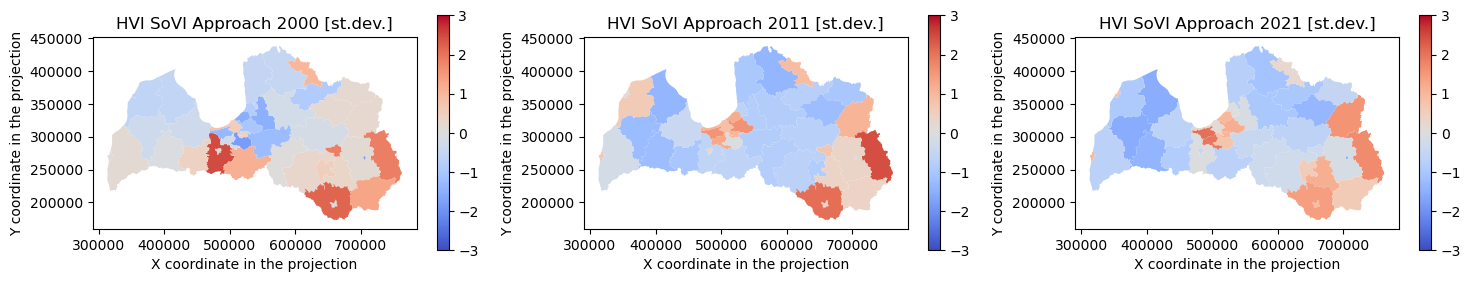

In [28]:
from matplotlib.colors import TwoSlopeNorm

sovi_gdfs = {}

# Merging the dataframes with the shapefile
for year, sovi_scores_df in sovi_scores_dfs.items():
    year_gdf = LV_LAU_2022.merge(sovi_scores_df, left_on='LABEL', right_on='LAU 2022', how='left')
    sovi_gdfs[year] = year_gdf

num_years = len(sovi_gdfs)
fig, axes = plt.subplots(1, num_years, figsize=(5 * num_years, 5), squeeze=False)

for col_idx, (year, year_gdf) in enumerate(sovi_gdfs.items()):
    ax = axes[0, col_idx]
    column_name = "Normalized HVI SoVIA score"

    # Set the normalization to have a fixed range of -3 to 3
    vmin, vcenter, vmax = -3, 0, 3
    norm = TwoSlopeNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)

    # Plot
    year_gdf.plot(
        column=column_name,
        ax=ax,
        legend=True,
        cmap='coolwarm',  # 'coolwarm' is ideal for diverging scales
        norm=norm,
        legend_kwds={'orientation': "vertical", 'shrink': 0.5}
    )
    ax.set_title(f"HVI SoVI Approach {year} [st.dev.]")
    ax.set_xlabel('X coordinate in the projection')
    ax.set_ylabel('Y coordinate in the projection')

plt.tight_layout()
plt.show()

**Saving the SoVI scores to the output folder for the part 5 of the whole analysis (Validation).**

In [29]:
#Creates HVI SoVI approach folder in the ouput folder
output_dir_for_sovi_scores = os.path.join("output","HVI_SoVIA","HVI_SoVIA_scores")
os.makedirs(output_dir_for_sovi_scores, exist_ok=True)
print(f"Output directory {'already exists' if os.path.exists(output_dir_for_sovi_scores) else 'created'}.")

Output directory already exists.


In [30]:
#Saves the sovi normalized datasets into the folder
for year, sovi_scores_df in sovi_scores_dfs.items():
    output_path = os.path.join(output_dir_for_sovi_scores, f"HVI_SoVIA_scores_{year}.csv")
    sovi_scores_df.to_csv(output_path, encoding='utf-8-sig')
    print(f"Saved normalized DataFrame for the year {year} to {output_path}")

Saved normalized DataFrame for the year 2000 to output\HVI_SoVIA\HVI_SoVIA_scores\HVI_SoVIA_scores_2000.csv
Saved normalized DataFrame for the year 2011 to output\HVI_SoVIA\HVI_SoVIA_scores\HVI_SoVIA_scores_2011.csv
Saved normalized DataFrame for the year 2021 to output\HVI_SoVIA\HVI_SoVIA_scores\HVI_SoVIA_scores_2021.csv


# write conclusion explanation on the results!

# Contributors

Institute for Environmental Studies (IVM) (the Netherlands).

Authors of the workflow: Alona Bogdanova